In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
import codesModel as codeM


In [2]:
# Opciones de pandas
rows, cols = 50, 50
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
data = pd.read_csv('data_technical_clean.csv', header=[0,1], index_col=0)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)
data

Attributes       Close                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-05    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-06    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-07    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-08    1.619704   3.005508   13.534367    2.775449    1.141212   
1985-03-11    1.588121   2.977763   13.730146    2.764918    1.144183   
...                ...        ...         ...         ...         ...   
2020-12-22  245.899994  91.573029  121.980003  229.573318  144.020004   
2020-12-23  244.250000  92.720818  122.266174  232.182770  144.410004   
2020-12-24  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-28  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-29  248.350006  91.982246  122.167496  233.049286  147.419998   

Attributes   CloseNext                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-05    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-06    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-07    1.619704   3.005508   13.534367    2.775449    1.141212   
1985-03-08    1.588121   2.977763   13.730146    2.764918    1.144183   
1985-03-11    1.606167   3.060992   13.769285    2.764918    1.159043   
...                ...        ...         ...         ...         ...   
2020-12-22  244.250000  92.720818  122.266174  232.182770  144.410004   
2020-12-23  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-24  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-28  248.350006  91.982246  122.167496  233.049286  147.419998   
2020-12-29  246.679993  93.030212  122.700371  235.031281  147.309998   

Attributes   Volume                                          bop             \
Symbol          BDX      GL      IBM      NSC      PEP       BDX         GL   
1985-03-05   576000  378000  4040000  1125900  5153400 -0.624992  42.000023   
1985-03-06   923200  450225  4120000  1773900  3722400 -0.857135  55.666877   
1985-03-07  1408000   71550  7028000   770400  4624200 -0.249985  54.666638   
1985-03-08   987200   69525  6892000  3031200  2764800 -0.666667  81.250315   
1985-03-11   692800  648675  4204000   936900  1609200 -0.750000  32.200041   
...             ...     ...      ...      ...      ...       ...        ...   
2020-12-22   941100  447600  4336100   806200  2653700 -0.464618  -0.358210   
2020-12-23   919500  554300  2693900  1209200  2645100 -0.927869   0.519739   
2020-12-24   440000   76100  1761100   383100   883300  0.710346  -0.255953   
2020-12-28   644500  345500  3615200   785100  2493500 -0.251941  -0.086706   
2020-12-29   817000  514800  3487000   929900  3186700 -0.305475  -0.923078   

Attributes                                    ema200                         \
Symbol           IBM       NSC       PEP         BDX         GL         IBM   
1985-03-05 -0.300000 -0.142862  0.700006    1.720674   3.251535   14.185128   
1985-03-06 -0.818182  0.363643 -0.749982    1.719894   3.249915   14.182029   
1985-03-07 -0.666667  1.000000  0.142847    1.719077   3.247759   14.176104   
1985-03-08 -0.466667 -0.875001 -0.400007    1.718088   3.245349   14.169718   
1985-03-11  0.812500 -0.250000 -0.333371    1.716795   3.242686   14.165344   
...              ...       ...       ...         ...        ...         ...   
2020-12-22  0.165748  0.247494 -0.381579  242.654200  85.275914  119.399113   
2020-12-23  0.013608  0.324324 -0.052289  242.670079  85.349993  119.427641   
2020-12-24 -0.348312  0.353474  0.237109  242.723013  85.423037  119.463642   
2020-12-28 -0.130841  0.149392  0.548543  242.777013  85.499524  119.500561   
2020-12-29 -0.691961 -0.496620 -0.134712  242.832466  85.564029  119.527098   

Attributes                              macd

## 1) Modelo donde escalamos solo las variables independientes

In [3]:
X = data.drop(['CloseNext'], level=0, axis=1)
y = data['CloseNext']

In [4]:
def dfM(stockName, X):
    scaler = StandardScaler()
    Xsc = scaler.fit_transform(X.xs(stockName, level=1, axis=1))
    df = pd.DataFrame(data = Xsc, columns = X.xs(stockName, level=1, axis=1).columns, index=X.xs(stockName, level=1, axis=1).index)
    df['CloseNext'] = y[stockName].values
    return df

In [5]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
data_scaler = pd.DataFrame()
for stock in stock_sel:
    df2 = dfM(stock, X) 
    df2.columns = pd.MultiIndex.from_product([df2.columns, [stock]], names=['Attributes', 'Symbol'])
    data_scaler = pd.concat([data_scaler, df2], axis=1).sort_index(axis=1)

data_scaler

Attributes     Close                                           CloseNext  \
Symbol           BDX        GL       IBM       NSC       PEP         BDX   
1985-03-05 -0.827281 -0.839889 -1.073245 -0.796551 -1.079229    1.642262   
1985-03-06 -0.827475 -0.840615 -1.077965 -0.796121 -1.079732    1.637751   
1985-03-07 -0.827539 -0.842794 -1.084072 -0.794829 -1.079816    1.619704   
1985-03-08 -0.827797 -0.843884 -1.085183 -0.795798 -1.079899    1.588121   
1985-03-11 -0.828249 -0.844974 -1.081018 -0.796013 -1.079816    1.606167   
...              ...       ...       ...       ...       ...         ...   
2020-12-22  2.666565  2.634794  1.221644  3.839015  2.945634  244.250000   
2020-12-23  2.642963  2.679876  1.227731  3.892342  2.956622  247.990005   
2020-12-24  2.696462  2.678700  1.244314  3.918191  2.974935  248.149994   
2020-12-28  2.698751  2.695165  1.247043  3.965412  3.027058  248.350006   
2020-12-29  2.701612  2.650867  1.225632  3.910050  3.041427  246.679993   

Attributes                                                   Volume            \
Symbol             GL         IBM         NSC         PEP       BDX        GL   
1985-03-05   3.088737   13.873695    2.759651    1.147157 -0.719720 -0.594723   
1985-03-06   3.033250   13.586567    2.822849    1.144183 -0.242853 -0.508574   
1985-03-07   3.005508   13.534367    2.775449    1.141212  0.423002 -0.960252   
1985-03-08   2.977763   13.730146    2.764918    1.144183 -0.154951 -0.962667   
1985-03-11   3.060992   13.769285    2.764918    1.159043 -0.559299 -0.271866   
...               ...         ...         ...         ...       ...       ...   
2020-12-22  92.720818  122.266174  232.182770  144.410004 -0.218268 -0.511705   
2020-12-23  92.690872  123.045761  233.447678  145.059998 -0.247935 -0.384435   
2020-12-24  93.110062  123.174042  235.758347  146.910004 -0.906511 -0.954825   
2020-12-28  91.982246  122.167496  233.049286  147.419998 -0.625637 -0.633488   
2020-12-29  93.030212  122.700371  235.031281  147.309998 -0.388715 -0.431550   

Attributes                                     bop                      \
Symbol           IBM       NSC       PEP       BDX        GL       IBM   
1985-03-05 -0.696469 -0.370145  0.178135 -1.156526  2.141280 -0.582557   
1985-03-06 -0.678160  0.101955 -0.369045 -1.572225  2.916646 -1.541034   
1985-03-07 -0.012646 -0.629145 -0.024218 -0.484997  2.859899 -1.260778   
1985-03-08 -0.043771  1.017961 -0.735208 -1.231152  4.368079 -0.890839   
1985-03-11 -0.658936 -0.507841 -1.177081 -1.380377  1.585294  1.475225   
...              ...       ...       ...       ...       ...       ...   
2020-12-22 -0.628705 -0.603063 -0.777690 -0.869343 -0.261843  0.278933   
2020-12-23 -1.004532 -0.309457 -0.780978 -1.698887 -0.212034 -0.002479   
2020-12-24 -1.218010 -0.911313 -1.454648  1.234673 -0.256042 -0.671920   
2020-12-28 -0.793687 -0.618435 -0.838946 -0.488501 -0.246440 -0.269665   
2020-12-29 -0.823026 -0.512941 -0.573883 -0.584364 -0.293890 -1.307564   

Attributes                        ema200                                \
Symbol           NSC       PEP       BDX        GL       IBM       NSC   
1985-03-05 -0.299008  1.250722 -0.821408 -0.829413 -1.058602 -0.809074   
1985-03-06  0.633997 -1.535893 -0.821420 -0.829480 -1.058669 -0.809076   
1985-03-07  1.806196  0.179964 -0.821432 -0.829568 -1.058797 -0.809065   
1985-03-08 -1.647641 -0.863304 -0.821447 -0.829666 -1.058934 -0.809063   
1985-03-11 -0.496361 -0.735243 -0.821466 -0.829774 -1.059028 -0.809065   
...              ...       ...       ...       ...       ...       ...   
2020-12-22  0.420046 -0.827889  2.769609  2.516586  1.205041  3.636466   
2020-12-23  0.561569 -0.195053  2.769846  2.519608  1.205655  3.642539   
2020-12-24  0.615266  0.361117  2.770635  2.522587  1.206430  3.648830   
2020-12-28  0.239337  0.959637  2.771440  2.525708  1.207224  3.655565   
2020-12-29 -0.950645 -0.353455  2.772266  2.528339  1.207795  3.661638   

Attributes                macd 

## Trabajo con la accion NSC usando standarizacion

In [6]:
dataNSC_scaler = data_scaler.xs('NSC', level=1, axis=1)
dataNSC_scaler

Attributes,Close,CloseNext,Volume,bop,ema200,macd,momentum,signal,std20d
1985-03-05,-0.796551,2.759651,-0.370145,-0.299008,-0.809074,-0.138570,-0.034611,-0.145445,-0.632713
1985-03-06,-0.796121,2.822849,0.101955,0.633997,-0.809076,-0.138592,-0.003717,-0.145872,-0.632713
1985-03-07,-0.794829,2.775449,-0.629145,1.806196,-0.809065,-0.134731,0.031587,-0.145390,-0.632713
1985-03-08,-0.795798,2.764918,1.017961,-1.647641,-0.809063,-0.134606,-0.061090,-0.144978,-0.632713
1985-03-11,-0.796013,2.764918,-0.507841,-0.496361,-0.809065,-0.135163,-0.030196,-0.144767,-0.632713
...,...,...,...,...,...,...,...,...,...
2020-12-22,3.839015,232.182770,-0.603063,0.420046,3.636466,-0.397124,0.279083,0.790954,2.008182
2020-12-23,3.892342,233.447678,-0.309457,0.561569,3.642539,-0.359127,2.165260,0.556225,1.892915
2020-12-24,3.918191,235.758347,-0.911313,0.615266,3.648830,-0.249800,1.038579,0.391753,1.778689
2020-12-28,3.965412,233.049286,-0.618435,0.239337,3.655565,-0.022162,1.914891,0.308711,1.587939


In [7]:
# Realizamos el holdout
#HOLDOUT = 5
#for i in range(HOLDOUT):
model = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
parameter_space = {
    'n_estimators': [100, 150, 200],
    'min_samples_leaf': [1, 3, 6],
    'max_features': ['auto', 0.5],
    'oob_score': [True, False],
    'max_depth' :[None, 7],
    

}
i=0.3
codeM.gridSearch(model,dataNSC_scaler, parameter_space,0.3,8,i)

{'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 200, 'oob_score': True}
1.2067773322238842


In [6]:
Params = {'max_features': 0.5, 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200, 'oob_score': True}
model = RandomForestRegressor(max_features= Params['max_features'], max_depth= Params['max_depth'],  min_samples_leaf= Params['min_samples_leaf'], n_estimators=Params['n_estimators'], oob_score= Params['oob_score'])


## CrossValidation

In [10]:
codeM.crossValidation(model, Params, dataNSC_scaler)

[0.0146313  0.01425587 0.01368058 0.0139409  0.01404962 0.01465939
 0.01373249 0.01361983 0.0143896  0.01419634]
mean: 0.014115591877765812	 std:0.0003577157626626395


## Prediccion de todas las acciones, escalandolas

'NSC'

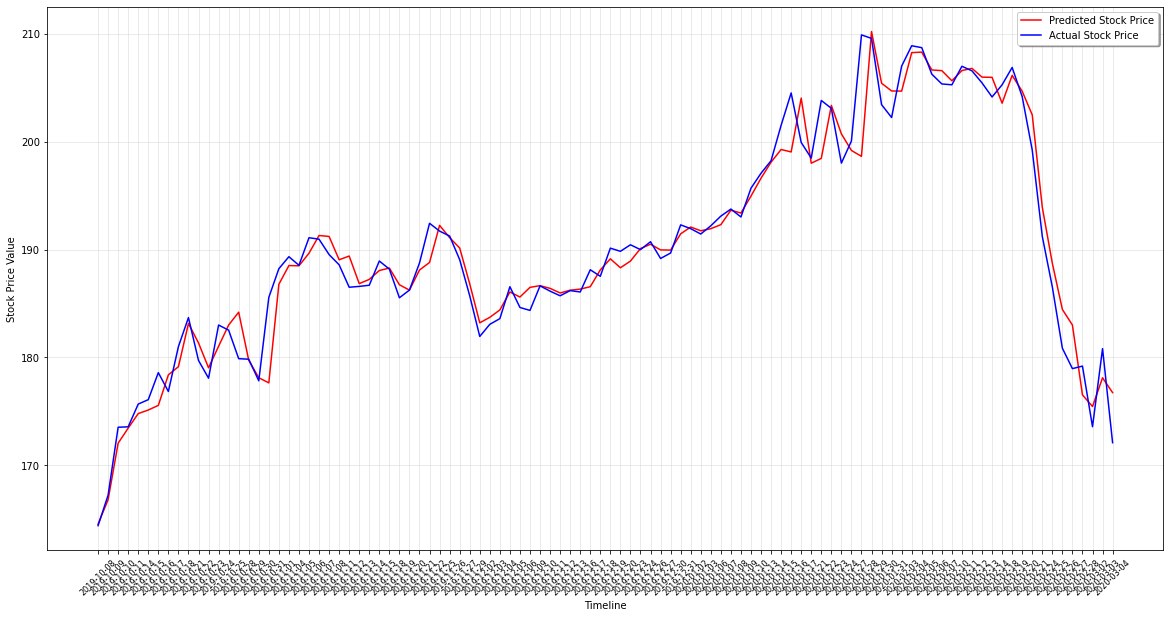

Train mae: 0.21035154821921367
Train rmse: 0.4456488622744701
mae: 0.58201806244
rmse: 1.3260767197107624
mape: 0.014164611615877476


'GL'

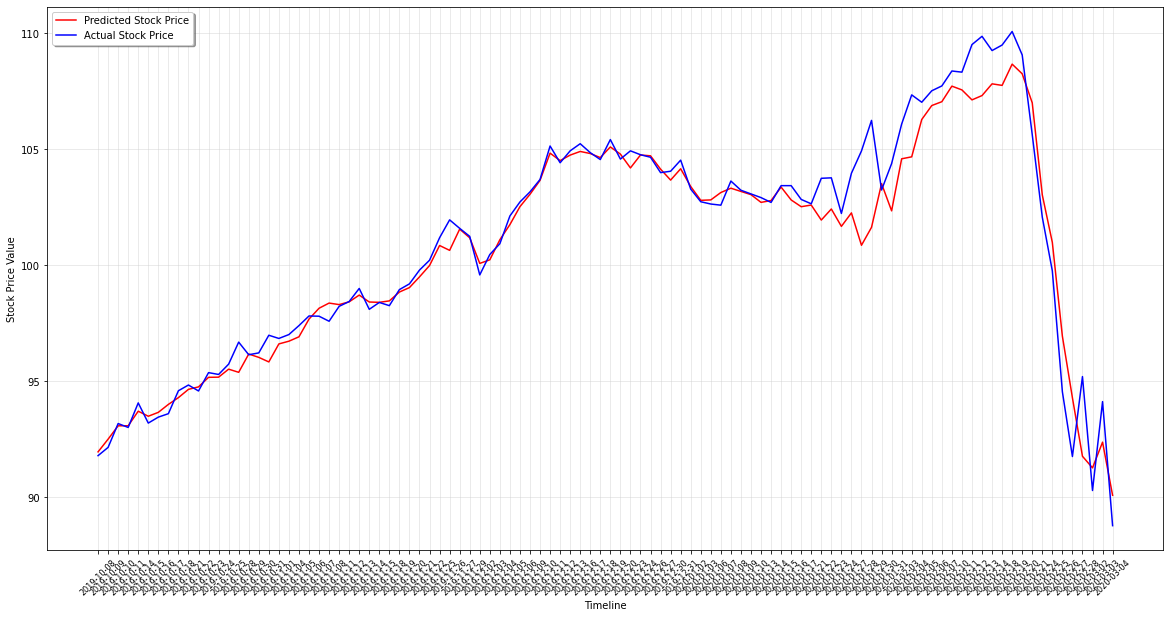

Train mae: 0.09759733442471129
Train rmse: 0.20831345994667844
mae: 0.2826020500410435
rmse: 0.6252515112564984
mape: 0.013310684484533649


'PEP'

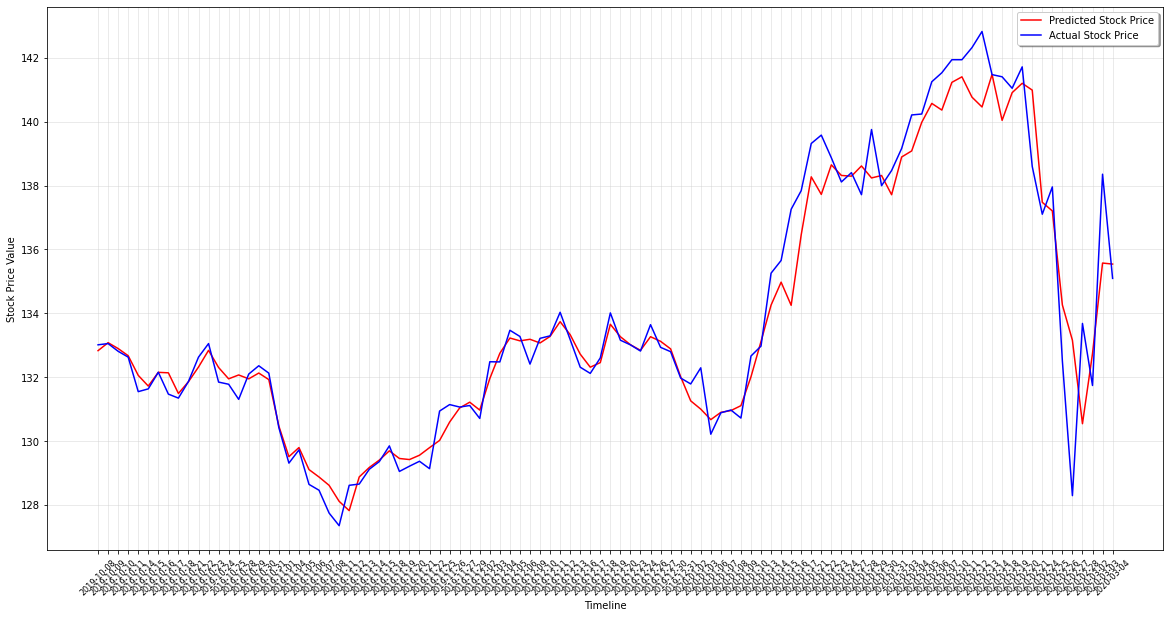

Train mae: 0.12819181199928875
Train rmse: 0.25908675978827106
mae: 0.3690682047755133
rmse: 0.7581177197814227
mape: 0.011219345584314377


'BDX'

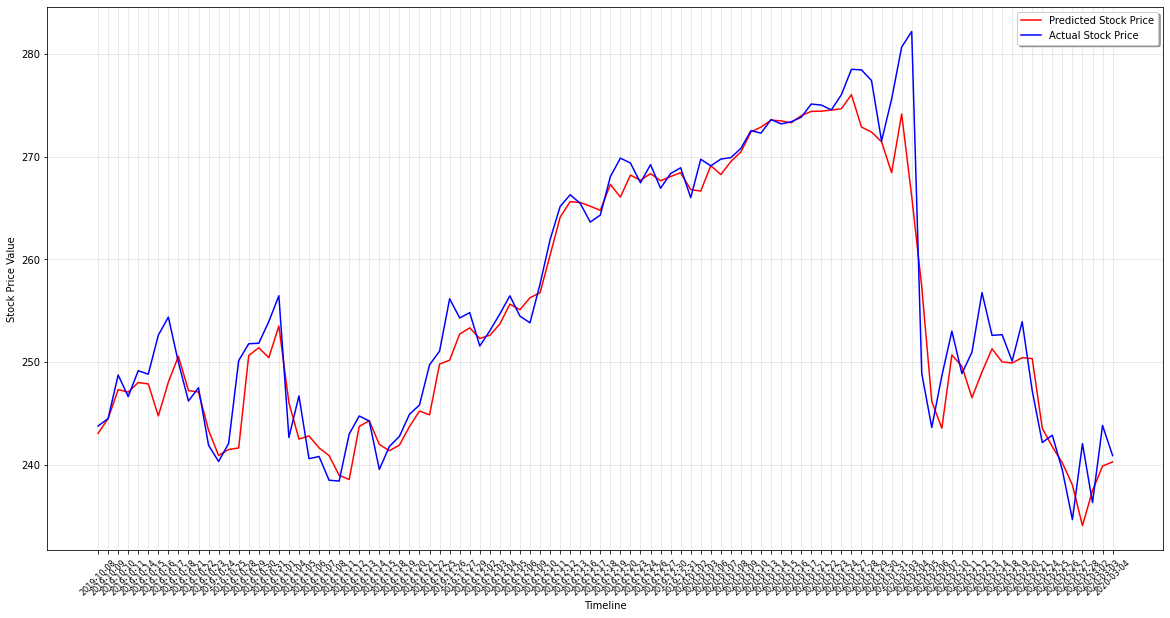

Train mae: 0.2326607583426651
Train rmse: 0.529047536063756
mae: 0.6628325163477592
rmse: 1.4655748892285538
mape: 0.012096873253844335


'IBM'

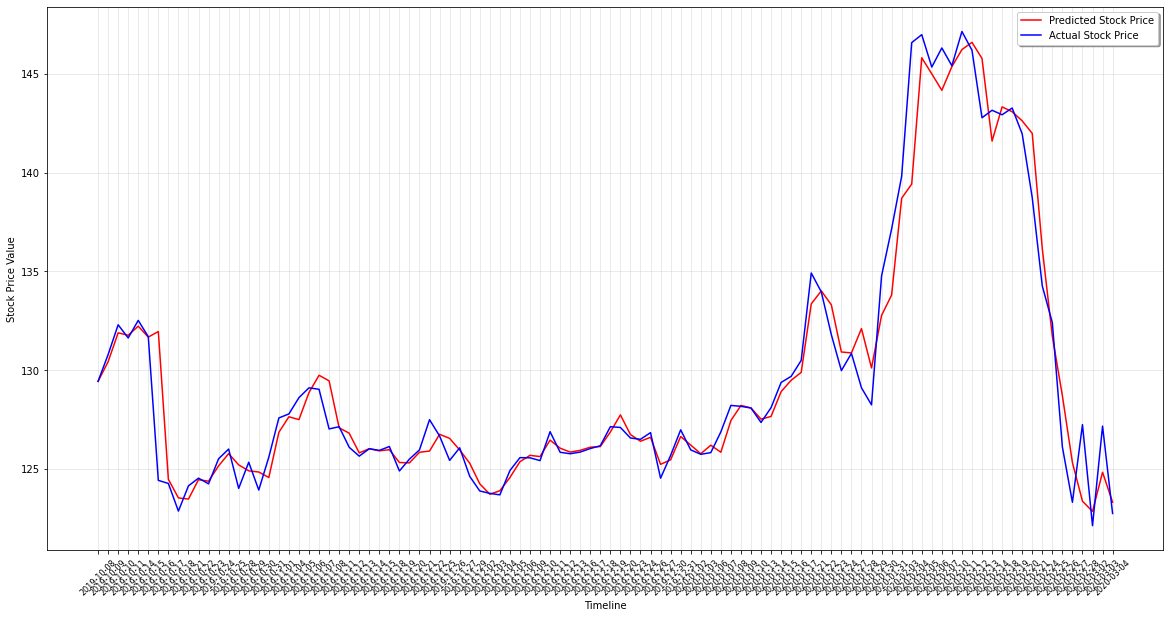

Train mae: 0.2669748073362735
Train rmse: 0.4447496569739693
mae: 0.7754136430191877
rmse: 1.3393600272704482
mape: 0.012737105096588484


In [7]:
codeM.allStock(data_scaler, model, 8)


## 2) Modelo donde escalamos las variables independientes y la dependiente

## gridsearch

In [13]:
# Realizamos el holdout
#HOLDOUT = 5
sc_predict = StandardScaler()
stock=dataNSC_scaler
y_data = sc_predict.fit_transform(stock.values[:, stock.columns.get_loc('CloseNext'):stock.columns.get_loc('CloseNext')+1])    
#for i in range(HOLDOUT):
model = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
parameter_space = {
    'n_estimators': [100, 150, 200],
    'min_samples_leaf': [1, 3],
    'max_features': ['auto', 0.5],
    'oob_score': [True, False],
    'max_depth' :[None, 7],
}
i=0.3
codeM.gridSearch(model,stock, parameter_space,0.3,8,i, isScaled=True, sc_predict=sc_predict, y=y_data)

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100, 'oob_score': True}
0.005024997057586512


In [9]:
Params2 = {'max_features': 'auto', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100, 'oob_score': True}
model = RandomForestRegressor(max_features= Params2['max_features'], max_depth= Params2['max_depth'],  
                              min_samples_leaf= Params2['min_samples_leaf'], n_estimators=Params2['n_estimators'], 
                              oob_score= Params2['oob_score'])

## crossvalidation

In [17]:
codeM.crossValidation(model, Params2, dataNSC_scaler)

[0.01477438 0.01429162 0.01504015 0.01464796 0.01382822 0.01519594
 0.01470897 0.0147471  0.01422423 0.01433546]
mean: 0.014579404677311109	 std:0.0003889470382832413


## Todas las stocks

'NSC'

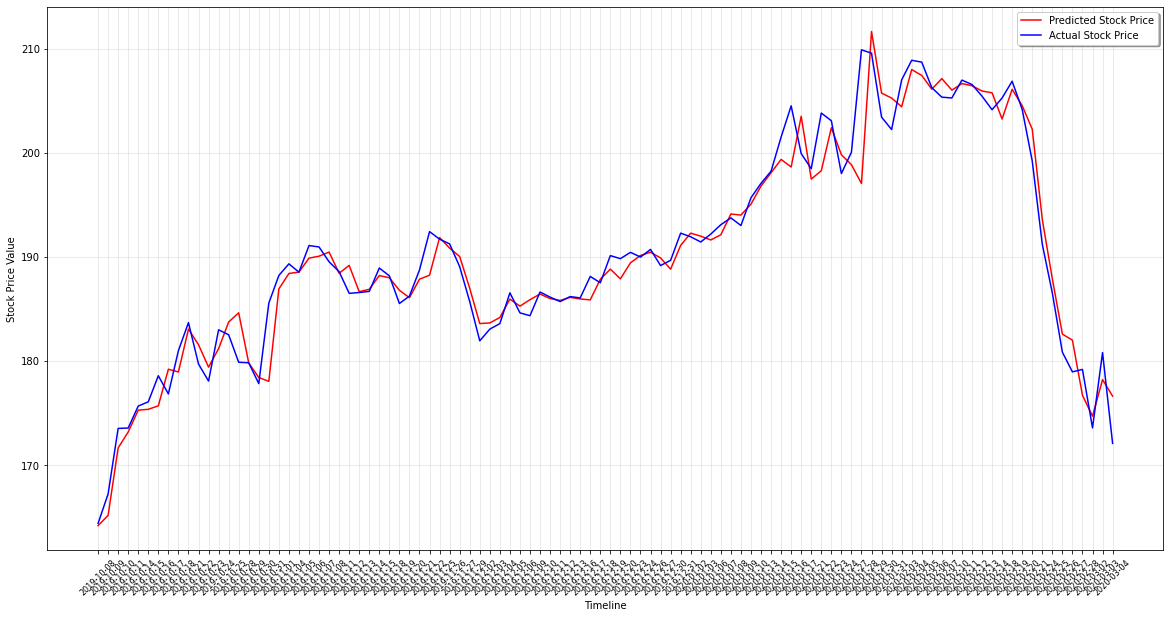

mae: 0.6064858971495785
rmse: 1.3630942401953117
mape: 0.014689270769911607


'GL'

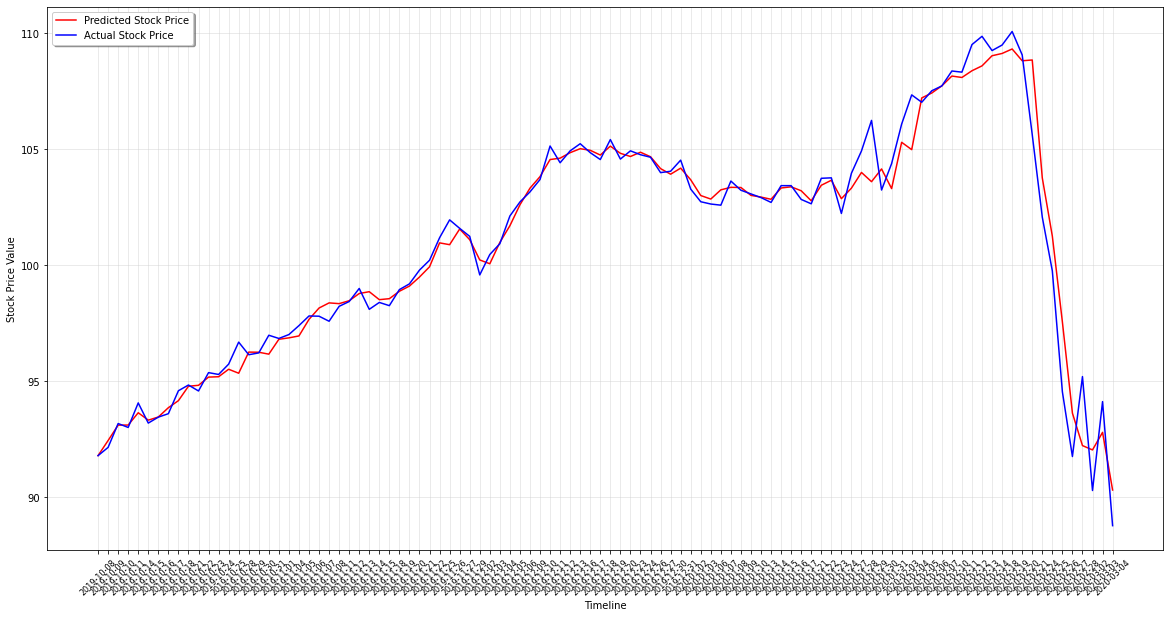

mae: 0.2898379285868008
rmse: 0.6376130142142129
mape: 0.01332403181480485


'PEP'

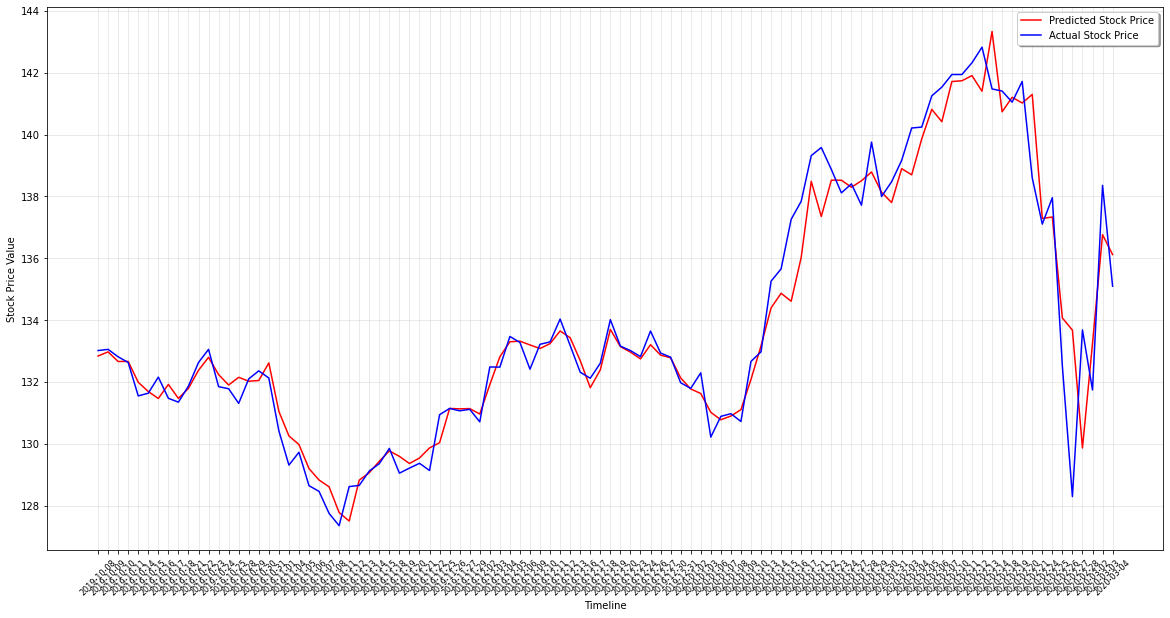

mae: 0.3850963999673245
rmse: 0.7828150666750422
mape: 0.011710909777760176


'BDX'

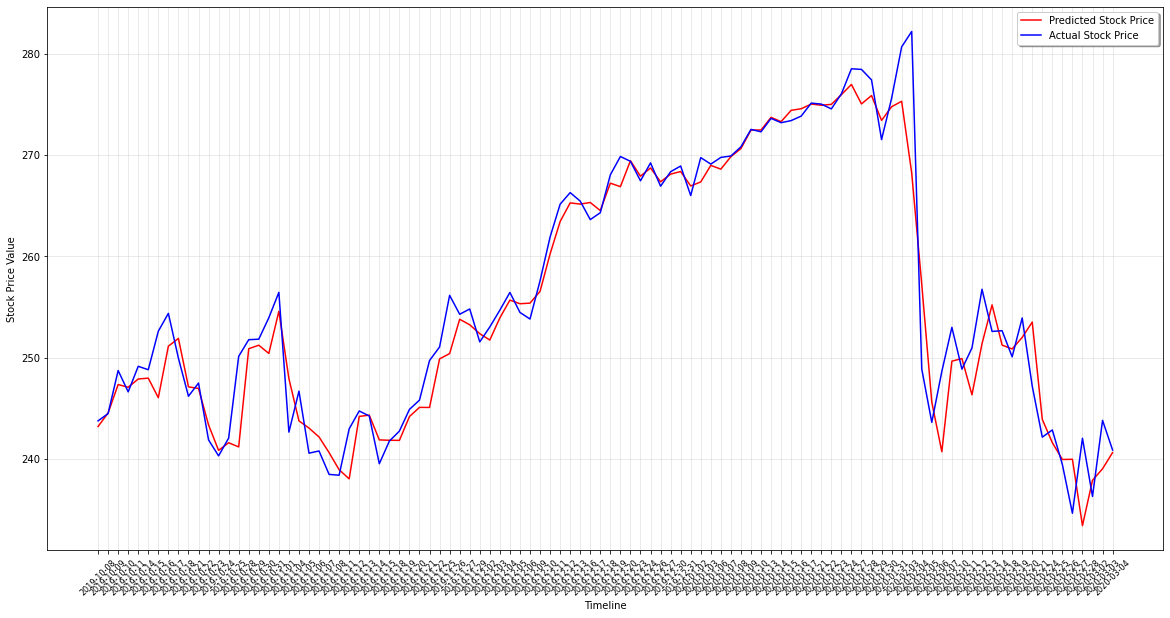

mae: 0.6654832027749678
rmse: 1.448355960937728
mape: 0.012388404048644792


'IBM'

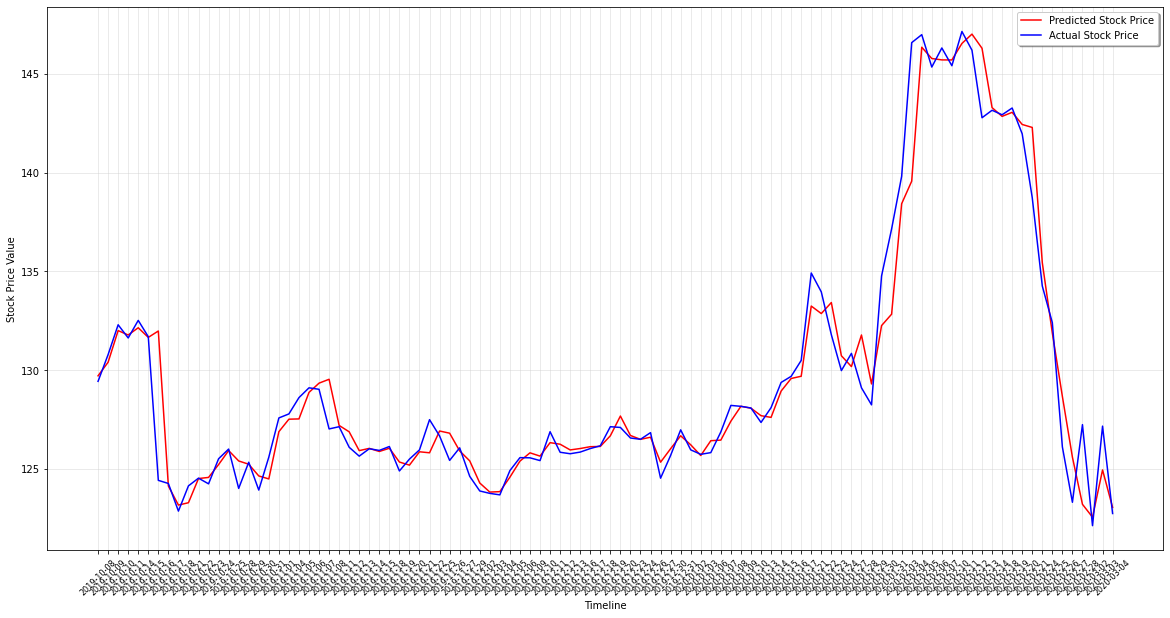

mae: 0.8021695206085804
rmse: 1.3817915600457535
mape: 0.013158053744996958


In [10]:
codeM.allStock(data, model, 8, isScaled=True)

## window

In [11]:
data_scaler_window = pd.read_csv('datawindow.csv', header=[0,1], index_col=0)
data_scaler_window.set_index(pd.DatetimeIndex(list(data_scaler_window.index)).strftime('%Y-%m-%d'), inplace=True)
data_scaler_window

Attributes           0                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-14    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-15    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-18    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-19    1.619704   3.005508   13.534367    2.775449    1.141212   
1985-03-20    1.588121   2.977763   13.730146    2.764918    1.144183   
...                ...        ...         ...         ...         ...   
2020-12-22  242.690002  93.519264  122.631294  234.304214  144.970001   
2020-12-23  240.000000  91.592987  121.901054  228.328339  144.229996   
2020-12-24  244.130005  93.529251  124.269409  228.876129  144.770004   
2020-12-28  245.289993  93.349594  123.894424  227.780548  144.889999   
2020-12-29  248.699997  93.249794  123.894424  229.762558  145.710007   

Attributes          1                                                    2  \
Symbol            BDX        GL        IBM        NSC        PEP       BDX   
1985-03-14   576000.0  378000.0  4040000.0  1125900.0  5153400.0 -0.624992   
1985-03-15   923200.0  450225.0  4120000.0  1773900.0  3722400.0 -0.857135   
1985-03-18  1408000.0   71550.0  7028000.0   770400.0  4624200.0 -0.249985   
1985-03-19   987200.0   69525.0  6892000.0  3031200.0  2764800.0 -0.666667   
1985-03-20   692800.0  648675.0  4204000.0   936900.0  1609200.0 -0.750000   
...               ...       ...        ...        ...        ...       ...   
2020-12-22  1274000.0  332200.0  4481400.0  1161200.0  2975500.0  0.498271   
2020-12-23  1236600.0  426600.0  5050000.0  2004900.0  3952400.0 -0.504374   
2020-12-24  1261700.0  411600.0  4359600.0  1210400.0  3183800.0  0.641740   
2020-12-28  1210700.0  315600.0  4530100.0  1081800.0  4915800.0  0.070539   
2020-12-29  1172500.0  337900.0  3788000.0  1097100.0  3312500.0  0.621545   

Attributes                                                    3             \
Symbol             GL       IBM       NSC       PEP         BDX         GL   
1985-03-14  42.000023 -0.300000 -0.142862  0.700006    1.720674   3.251535   
1985-03-15  55.666877 -0.818182  0.363643 -0.749982    1.719894   3.249915   
1985-03-18  54.666638 -0.666667  1.000000  0.142847    1.719077   3.247759   
1985-03-19  81.250315 -0.466667 -0.875001 -0.400007    1.718088   3.245349   
1985-03-20  32.200041  0.812500 -0.250000 -0.333371    1.716795   3.242686   
...               ...       ...       ...       ...         ...        ...   
2020-12-22  -0.041916  0.099997  0.122034  0.792896  242.387914  84.747340   
2020-12-23  -1.000000 -0.646210 -0.949631 -0.421490  242.364154  84.815455   
2020-12-24   0.488766  0.618475 -0.299998  0.152178  242.381724  84.902160   
2020-12-28  -0.379745 -0.296873 -0.369729  0.579617  242.410662  84.986214   
2020-12-29  -0.129997 -0.449154  0.188745  0.450985  242.473243  85.068439   

Attributes                                             4                      \
Symbol             IBM         NSC         PEP       BDX        GL       IBM   
1985-03-14   14.185128    2.769713    1.143313 -0.007366 -0.025473 -0.012914   
1985-03-15   14.182029    2.769613    1.143351 -0.011991 -0.032744 -0.034875   
1985-03-18   14.176104    2.770142    1.143359 -0.015837 -0.042494 -0.074589   
1985-03-19   14.169718    2.770195    1.143338 -0.020109 -0.051861 -0.109018   
1985-03-20   14.165344    2.770143    1.143346 -0.025747 -0.060823 -0.119132   
...                ...         ...         ...       ...       ...       ...   
2020-12-22  119.129244  202.686896  135.104759  1.462677  1.799938  2.289730   
2020-12-23  119.156825  202.942035  135.195557  1.466273  1.456414  2.078649   
2020-12-24  119.207696  203.200086  135.290825  1.781840  1.325134  2.078513   
2020-12-28  119.254330  203.444668  135.386339  2.101308  1.192846  2.024806   
2020-12-29  119.300500  203.706537  135.489062  2.599680  1.

In [13]:
dataNSC_scaler = data_scaler_window.xs('NSC', level=1, axis=1)

In [22]:
model = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
parameter_space = {
    'n_estimators': [100, 150, 200],
    'min_samples_leaf': [1, 3],
    'max_features': ['auto', 0.5],
    'oob_score': [True, False],
    'max_depth' :[None, 7],

}
i=0.3
codeM.gridSearch(model,dataNSC_scaler, parameter_space,0.3,8,i)

{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 200, 'oob_score': False}
0.04842676769047536


In [12]:
Params3 = {'max_features': 'auto', 'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 200, 'oob_score': False}
model = RandomForestRegressor(max_features= Params3['max_features'], max_depth= Params3['max_depth'],  
                              min_samples_leaf= Params3['min_samples_leaf'], n_estimators=Params3['n_estimators'], 
                              oob_score= Params3['oob_score'])

In [23]:
codeM.crossValidation(model, Params, dataNSC_scaler)

[0.02117766 0.02116536 0.0200376  0.02044254 0.02098195 0.02096126
 0.0206982  0.02093193 0.02154167 0.0205788 ]
mean: 0.020851697124831165	 std:0.0004055004544109511


'NSC'

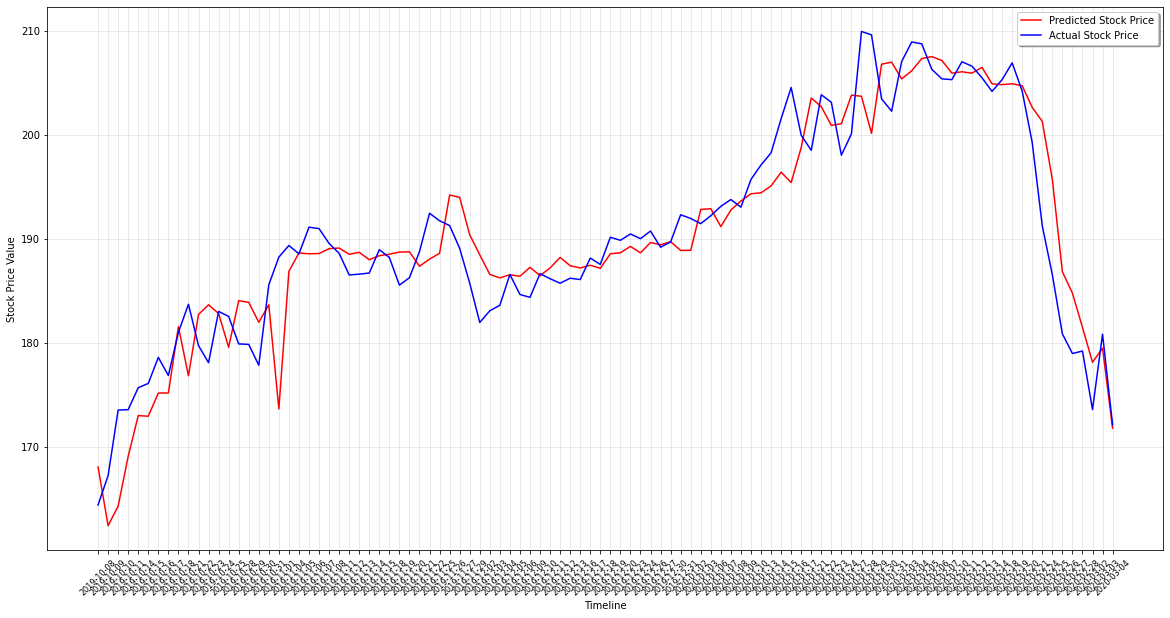

mae: 0.7718406938667877
rmse: 1.5447953418822624
mape: 0.020910380253239012


'GL'

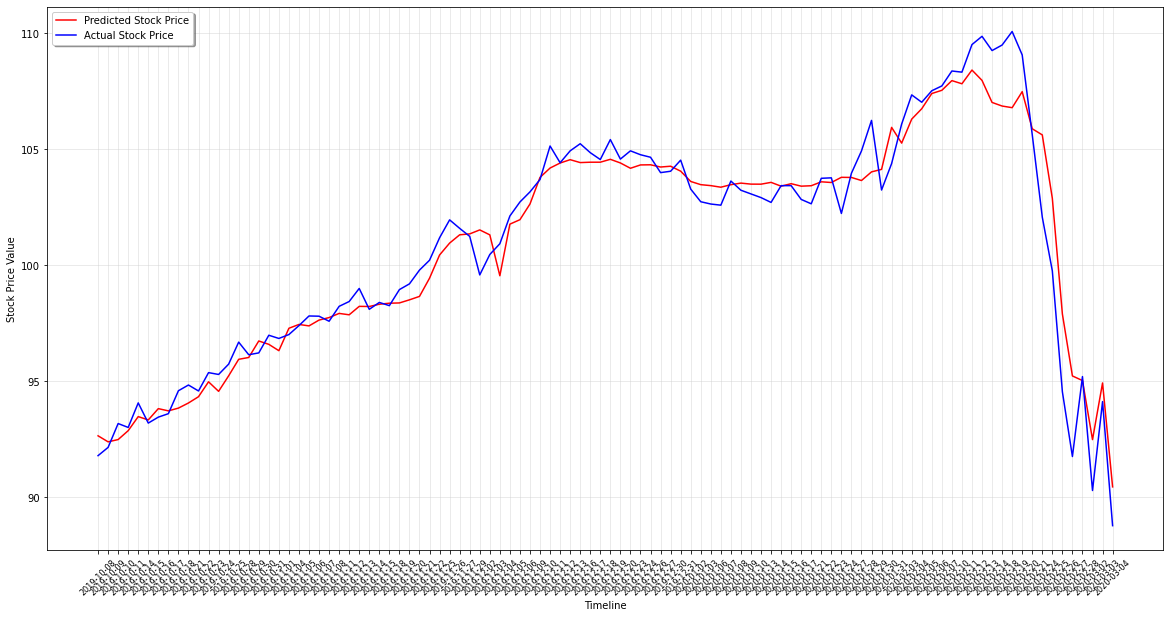

mae: 0.3656081820390994
rmse: 0.7368286375515264
mape: 0.018940647955466502


'PEP'

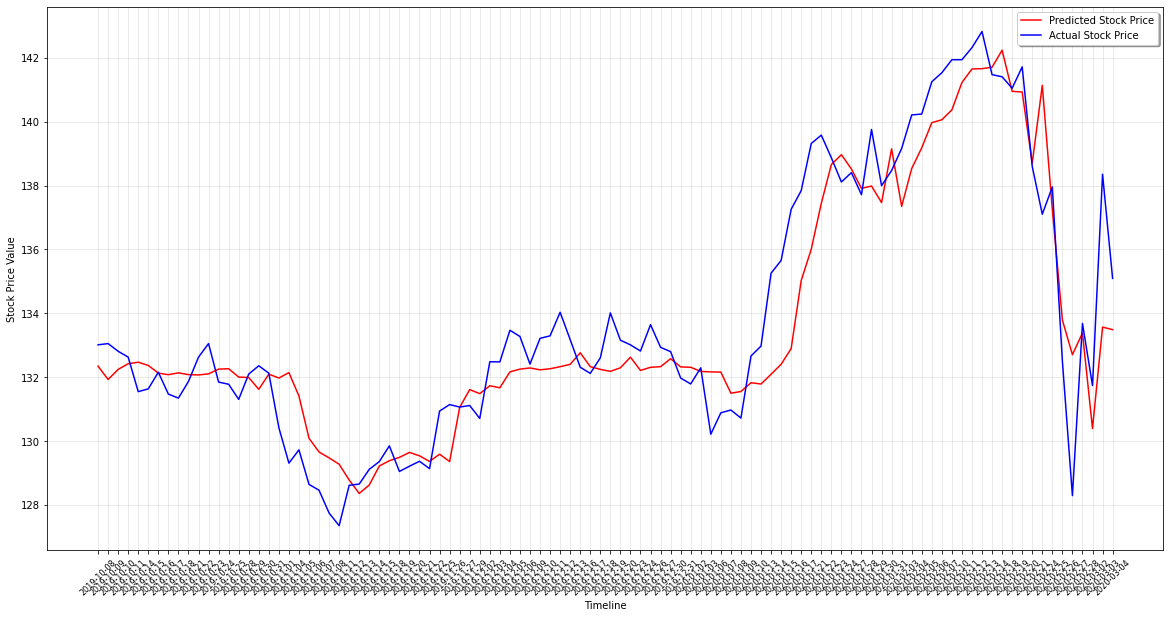

mae: 0.4943465092936679
rmse: 0.8479753024862409
mape: 0.019692717157507842


'BDX'

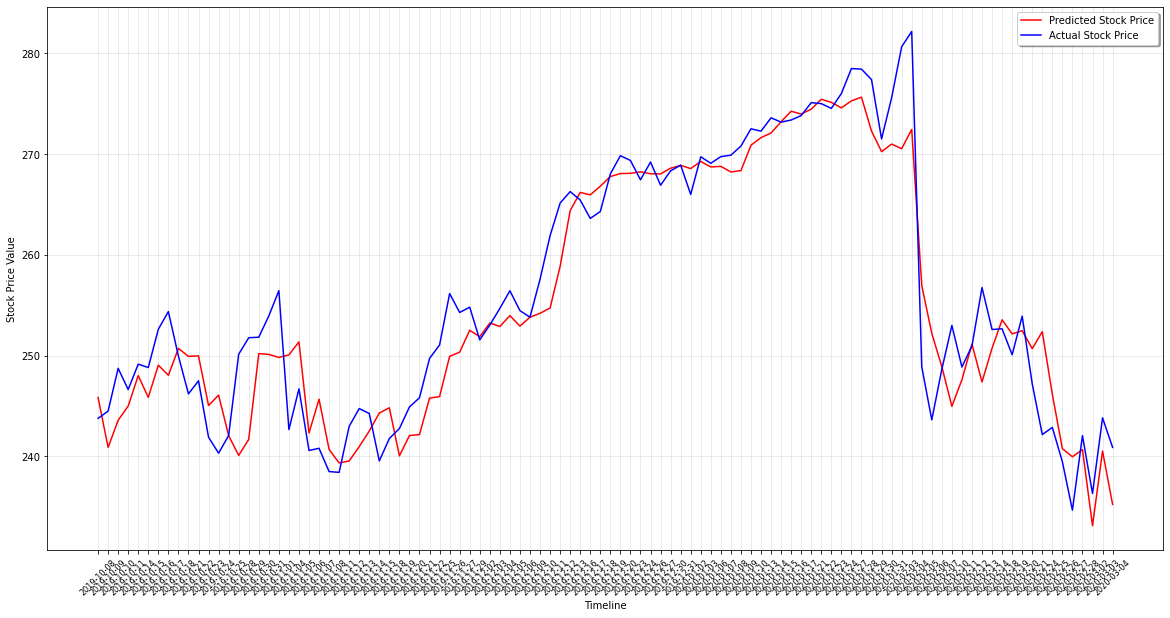

mae: 0.8801688684751081
rmse: 1.89278089910653
mape: 0.02167598406015766


'IBM'

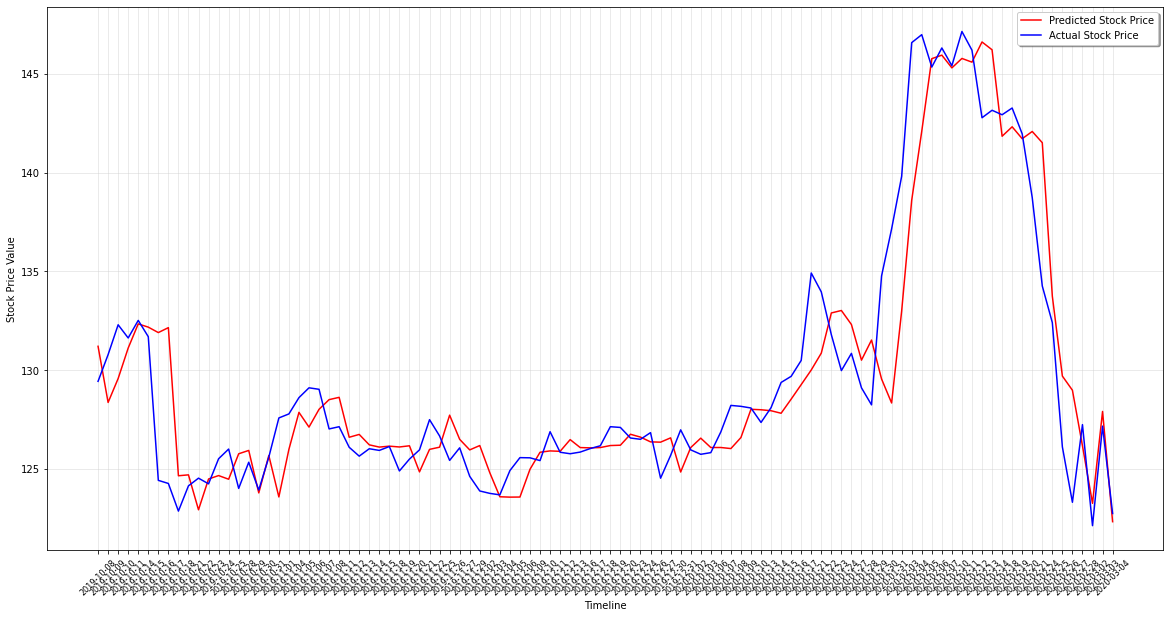

mae: 1.0429176477676947
rmse: 1.7202738996035993
mape: 0.018233669523728315


In [13]:
codeM.allStock(data_scaler_window, model, 8)

'NSC'

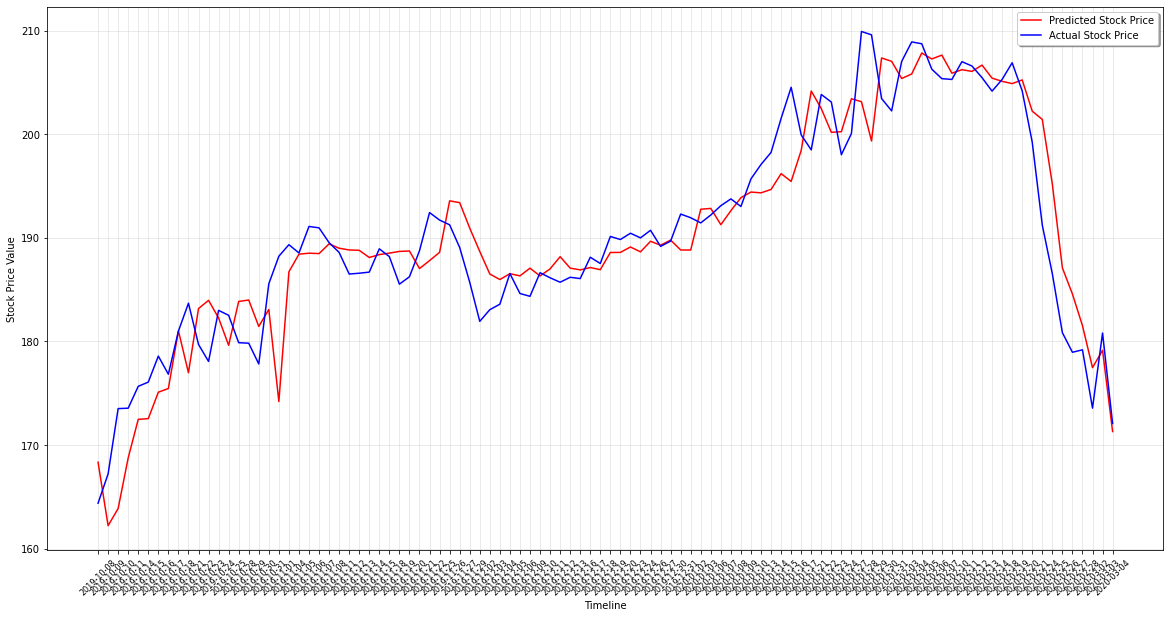

mae: 0.7722393312743794
rmse: 1.5539634688763133
mape: 0.020890630203090083


'GL'

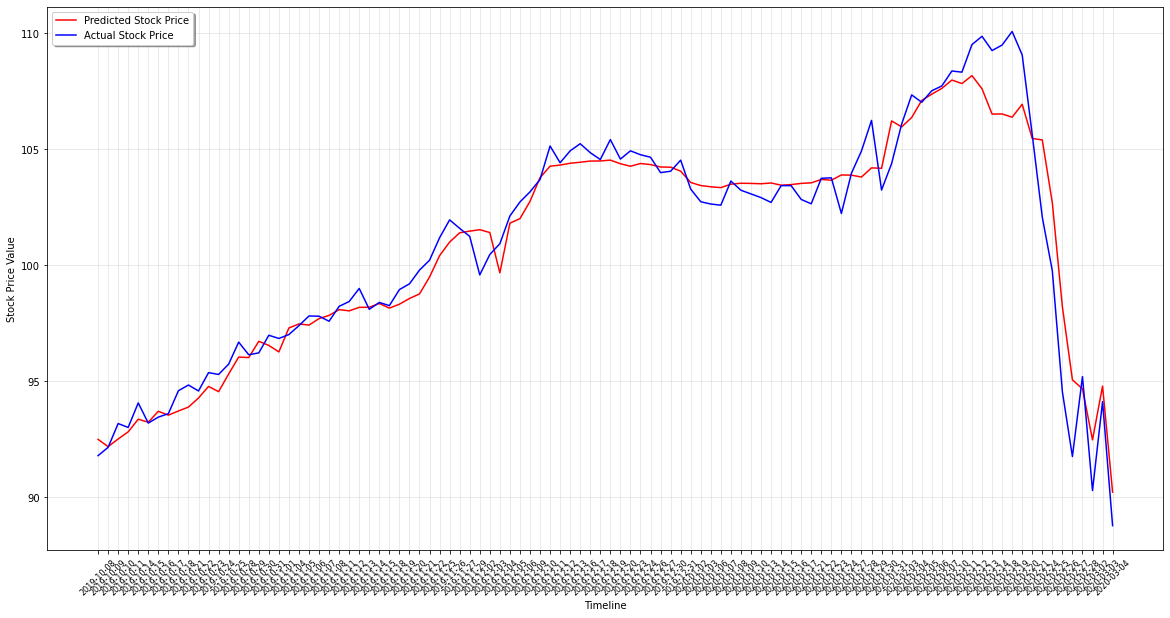

mae: 0.36524269045728636
rmse: 0.7358309359190955
mape: 0.018955183063077738


'PEP'

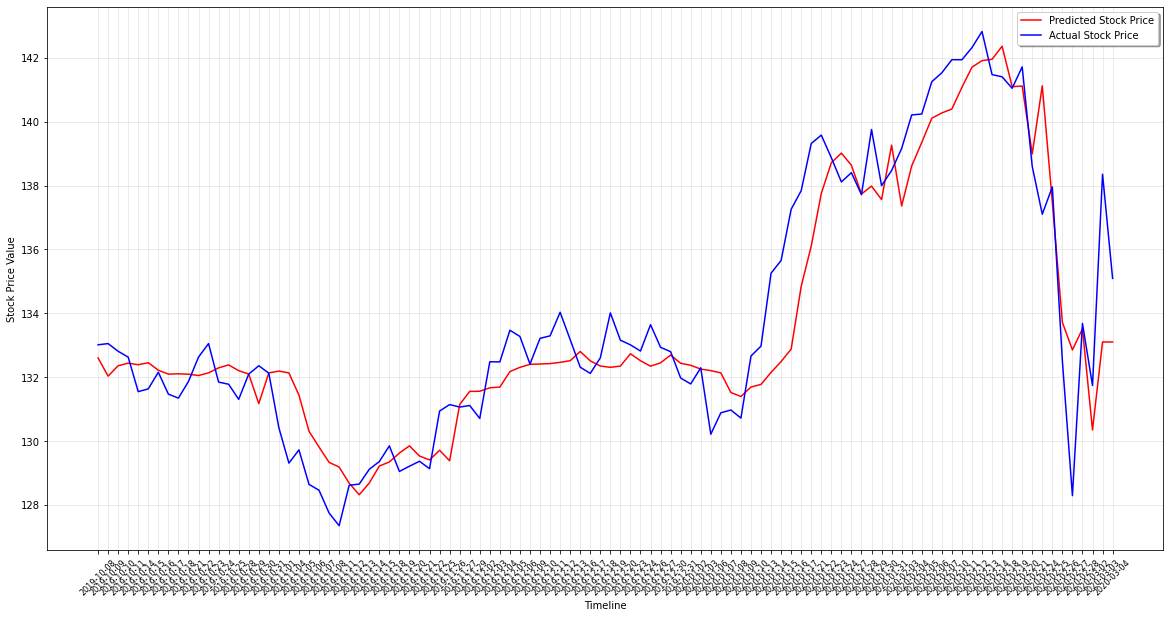

mae: 0.4953982323362836
rmse: 0.8523689971479509
mape: 0.019658964518326116


'BDX'

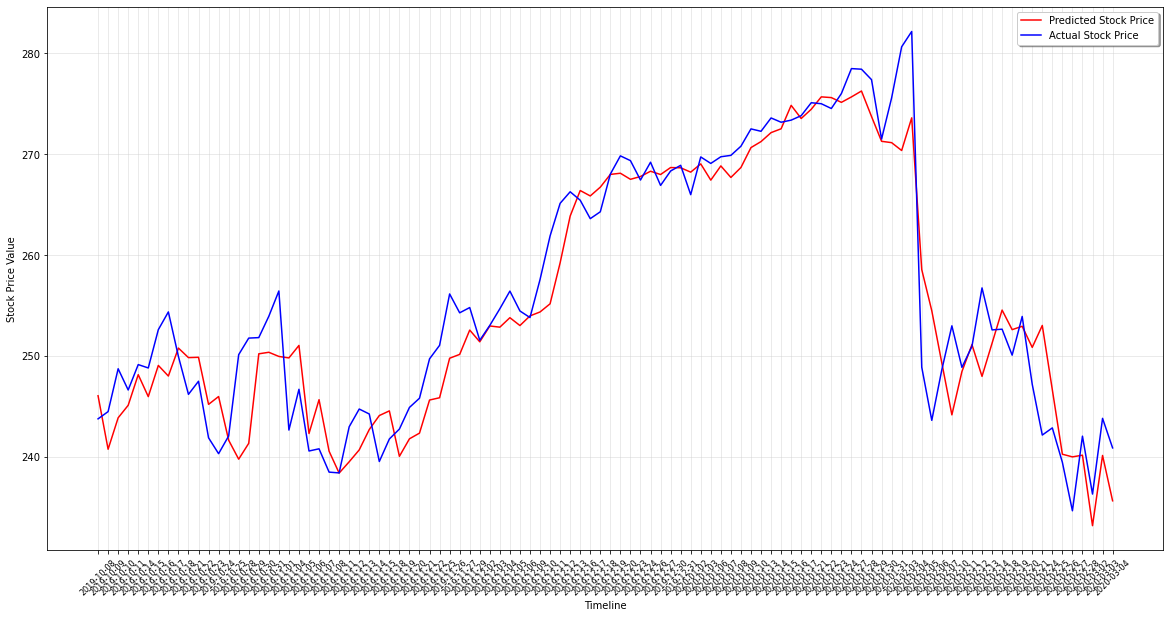

mae: 0.8830377388940892
rmse: 1.8918626541618457
mape: 0.021798977492598362


'IBM'

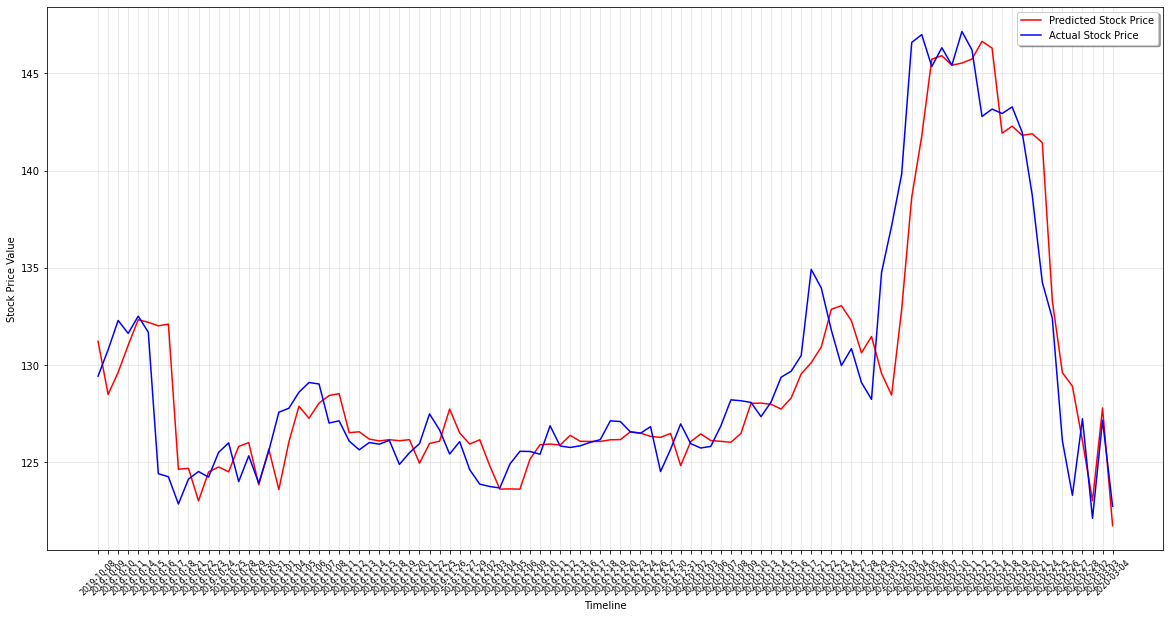

mae: 1.0436011253157558
rmse: 1.7288187788650768
mape: 0.018227047189856897


In [14]:
codeM.allStock(data_scaler_window, model, 8, isScaled=True)

## PCA 

In [15]:
data_scaler_PCA= pd.read_csv('dataPCA.csv', header=[0,1], index_col=0)
data_scaler_PCA.set_index(pd.DatetimeIndex(list(data_scaler_PCA.index)).strftime('%Y-%m-%d'), inplace=True)
data_scaler_PCA

Attributes         A                                                  B  \
Symbol           BDX        GL       IBM        NSC       PEP       BDX   
1985-03-05 -2.607346 -2.744748 -3.220998  -2.503028 -3.340982 -0.095462   
1985-03-06 -2.581420 -2.808429 -3.233605  -2.466942 -3.348152  0.021050   
1985-03-07 -2.543426 -2.792236 -3.320441  -2.513221 -3.343990  0.150642   
1985-03-08 -2.577317 -2.909088 -3.319276  -2.407511 -3.367740  0.041437   
1985-03-11 -2.601373 -2.725493 -3.227721  -2.512020 -3.386844 -0.039727   
...              ...       ...       ...        ...       ...       ...   
2020-12-22  8.633196  8.215010  3.636603  11.634582  8.949916 -2.239740   
2020-12-23  8.551392  8.184525  3.699907  11.668303  8.934178 -2.218183   
2020-12-24  8.483667  8.162911  3.734764  11.604364  8.875919 -2.673588   
2020-12-28  8.424258  8.153634  3.698655  11.677882  9.001638 -2.663747   
2020-12-29  8.417545  8.097457  3.669454  11.596079  9.082074 -2.687793   

Attributes                                                 C            \
Symbol            GL       IBM       NSC       PEP       BDX        GL   
1985-03-05 -0.104330 -0.068446 -0.160492 -0.049835  0.770484 -1.540526   
1985-03-06 -0.075275  0.064143 -0.100862 -0.091382  1.096881 -1.818180   
1985-03-07 -0.127229  0.148074 -0.288016 -0.063431  0.397070 -2.029712   
1985-03-08 -0.120372  0.118314  0.154614 -0.210034  0.869214 -2.877129   
1985-03-11  0.021261 -0.200119 -0.183881 -0.329133  0.941342 -0.951890   
...              ...       ...       ...       ...       ...       ...   
2020-12-22 -1.425100 -2.007629  0.696090 -2.411375  1.697642  0.395897   
2020-12-23 -1.372058 -1.879697  0.722763 -2.284390  2.121061 -1.223269   
2020-12-24 -1.233787 -1.775138  0.682003 -2.365089 -2.730829 -0.425018   
2020-12-28 -1.127726 -1.632272  0.545662 -2.303874  0.329748 -0.705930   
2020-12-29 -0.737660 -1.309197  0.913212 -2.238881  0.403500  0.934156   

Attributes                                 CloseNext                         \
Symbol           IBM       NSC       PEP         BDX         GL         IBM   
1985-03-05 -0.377351 -0.225016  0.883988    1.642262   3.088737   13.873695   
1985-03-06 -1.173861  0.462969 -1.114647    1.637751   3.033250   13.586567   
1985-03-07 -1.024686  1.304481  0.104625    1.619704   3.005508   13.534367   
1985-03-08 -0.624775 -1.175168 -0.619128    1.588121   2.977763   13.730146   
1985-03-11  1.182514 -0.363542 -0.515465    1.606167   3.060992   13.769285   
...              ...       ...       ...         ...        ...         ...   
2020-12-22  0.018910  0.415500 -2.156588  244.250000  92.720818  122.266174   
2020-12-23 -0.109658  1.862171  0.142444  247.990005  92.690872  123.045761   
2020-12-24 -0.268454  1.106873  0.822187  248.149994  93.110062  123.174042   
2020-12-28 -0.364106  1.461245  2.490734  248.350006  91.982246  122.167496   
2020-12-29 -1.733772 -2.332660  0.164242  246.679993  93.030212  122.700371   

Attributes                                 D                                \
Symbol             NSC         PEP       BDX        GL       IBM       NSC   
1985-03-05    2.759651    1.147157 -0.739363  0.915692 -1.098949 -0.166401   
1985-03-06    2.822849    1.144183 -0.354145  1.309586 -1.158762  0.306748   
1985-03-07    2.775449    1.141212  0.463095  1.529128 -0.534397 -0.389850   
1985-03-08    2.764918    1.144183 -0.214694  2.060377 -0.544549  1.169372   
1985-03-11    2.764918    1.159043 -0.626982  0.724351 -0.916661 -0.303095   
...                ...         ...       ...       ...       ...       ...   
2020-12-22  232.182770  144.410004 -0.238490  0.995087 -0.181399 -1.676750   
2020-12-23  233.447678  145.059998 -0.430746 -1.454770 -0.573556 -1.449573   
2020-12-24  235.758347  146.910004 -0.635011  0.491356 -0.858887 -2.026808   
2020-12-28  233.049286  147.419998 -0.613183 -0.298445 -0.438297 -1.746892   
2020-12-29  235.031281  147.309998 -0.400044  1.878081 -0.549057 -1.596162   

Attributes        

In [20]:
dataNSC_scaler = data_scaler_PCA.xs('NSC', level=1, axis=1)

#dataNSC_scaler
model = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
parameter_space = {
    'n_estimators': [100, 150, 200],
    'min_samples_leaf': [1, 3],
    'max_features': ['auto', 0.5],
    'oob_score': [True, False],
    'max_depth' :[None, 6],
}
i=0.2
codeM.gridSearch(model,dataNSC_scaler, parameter_space,0.3,6,i)

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 150, 'oob_score': False}
1.5468759089641713


In [16]:
Params4 = {'max_features': 'auto', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 150, 'oob_score': False}
model = RandomForestRegressor(max_features= Params4['max_features'], max_depth= Params4['max_depth'],  
                              min_samples_leaf= Params4['min_samples_leaf'], n_estimators=Params4['n_estimators'], 
                              oob_score= Params4['oob_score'])

In [22]:
codeM.crossValidation(model, Params4, dataNSC_scaler)

[0.02162262 0.02065647 0.02030922 0.02150075 0.02188089 0.02185674
 0.02164653 0.02065785 0.0206382  0.02099444]
mean: 0.021176371653335836	 std:0.0005566425762140149


'NSC'

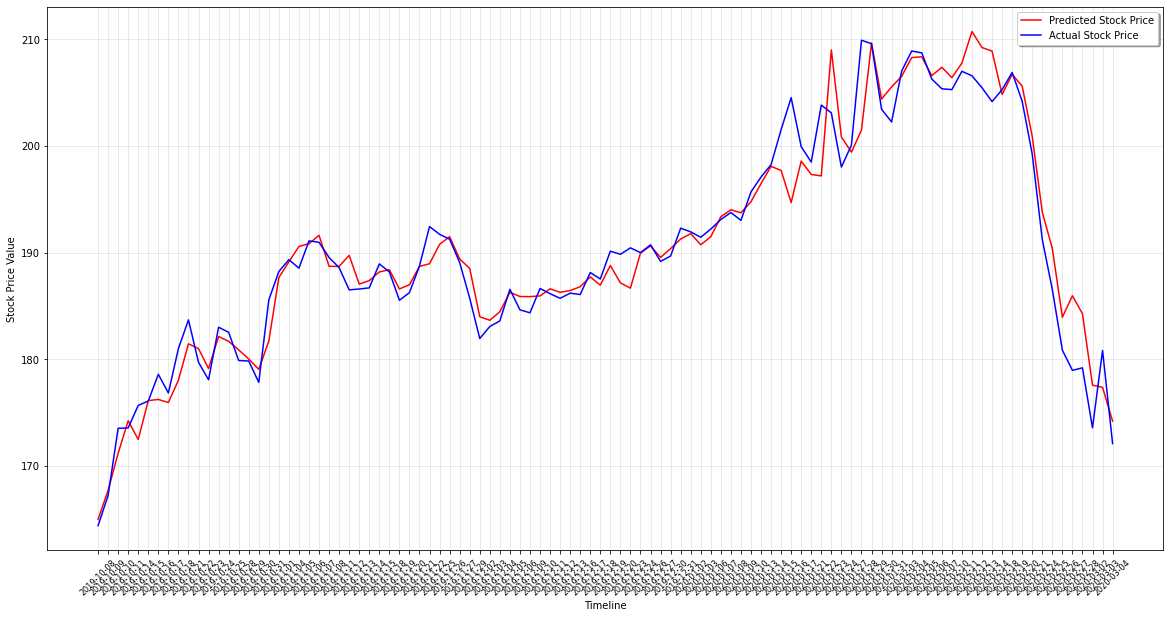

mae: 0.8140369020394914
rmse: 1.7343524163738973
mape: 0.022096479065480474


'GL'

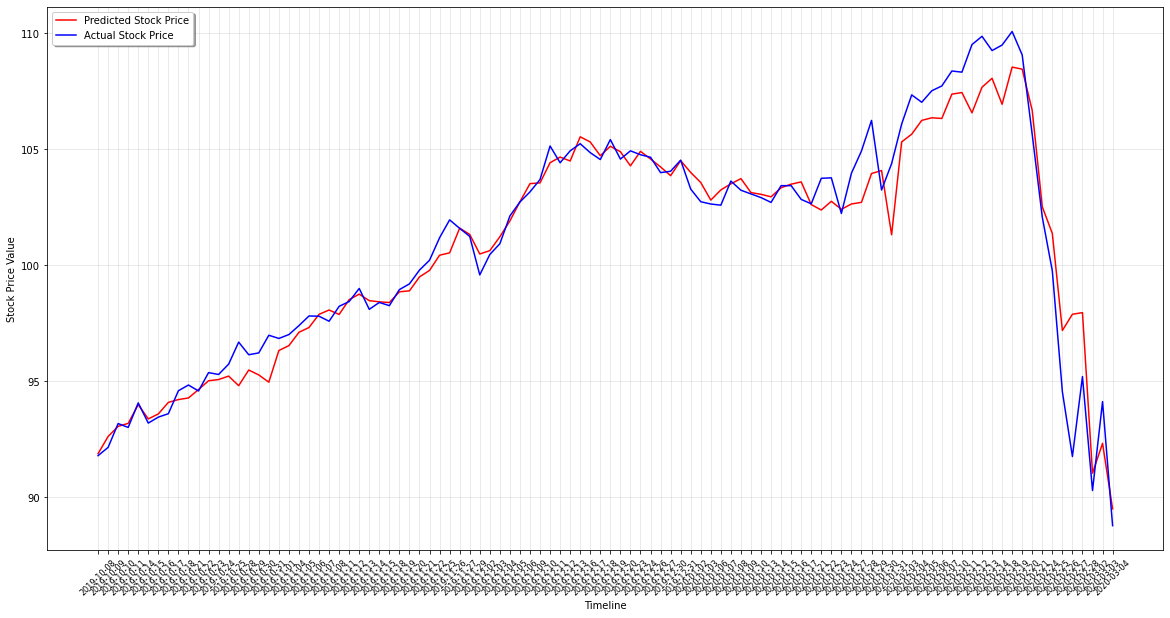

mae: 0.38403217479166724
rmse: 0.8915210318911797
mape: 0.022349651804396093


'PEP'

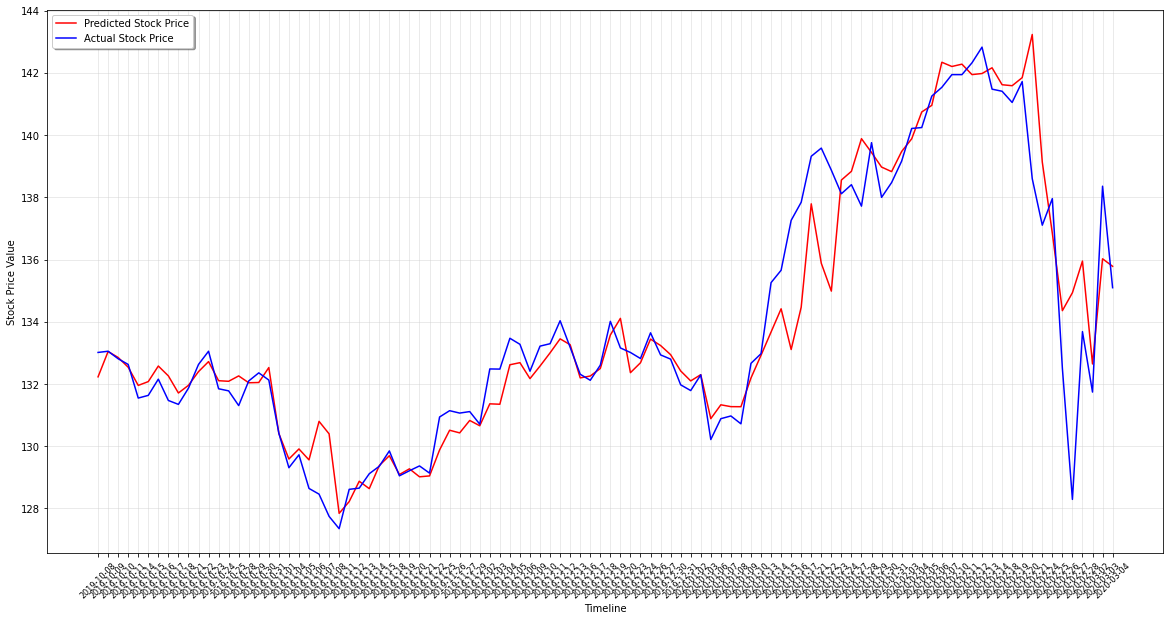

mae: 0.529986327503299
rmse: 0.9520972312386587
mape: 0.01999493680294154


'BDX'

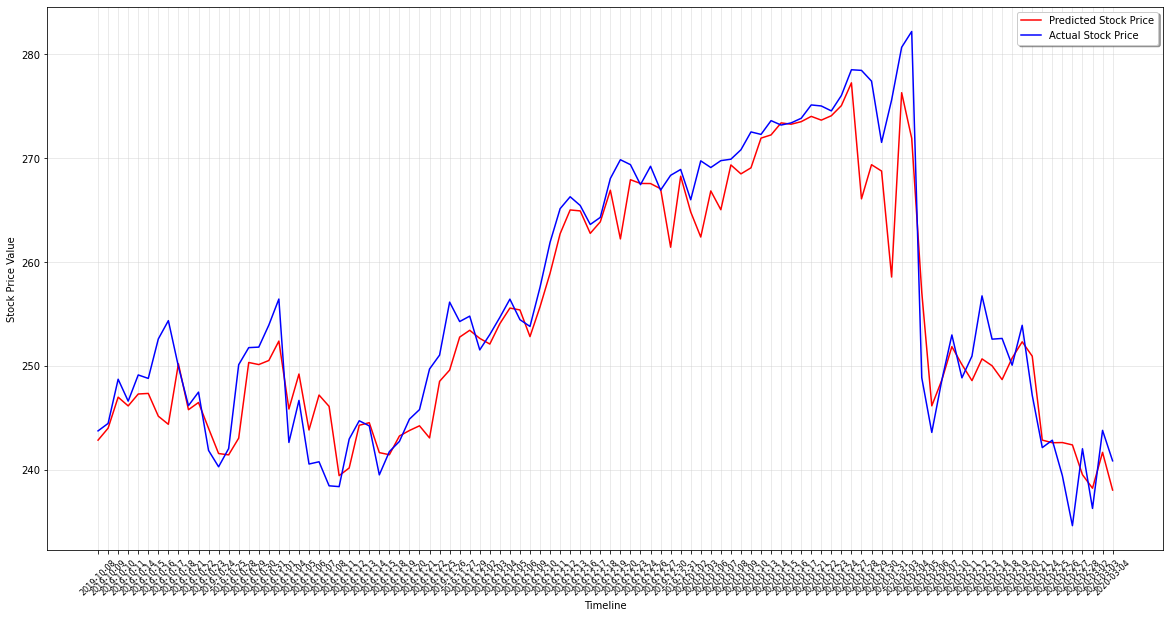

mae: 1.008950426612259
rmse: 2.112274732799842
mape: 0.02550141195781766


'IBM'

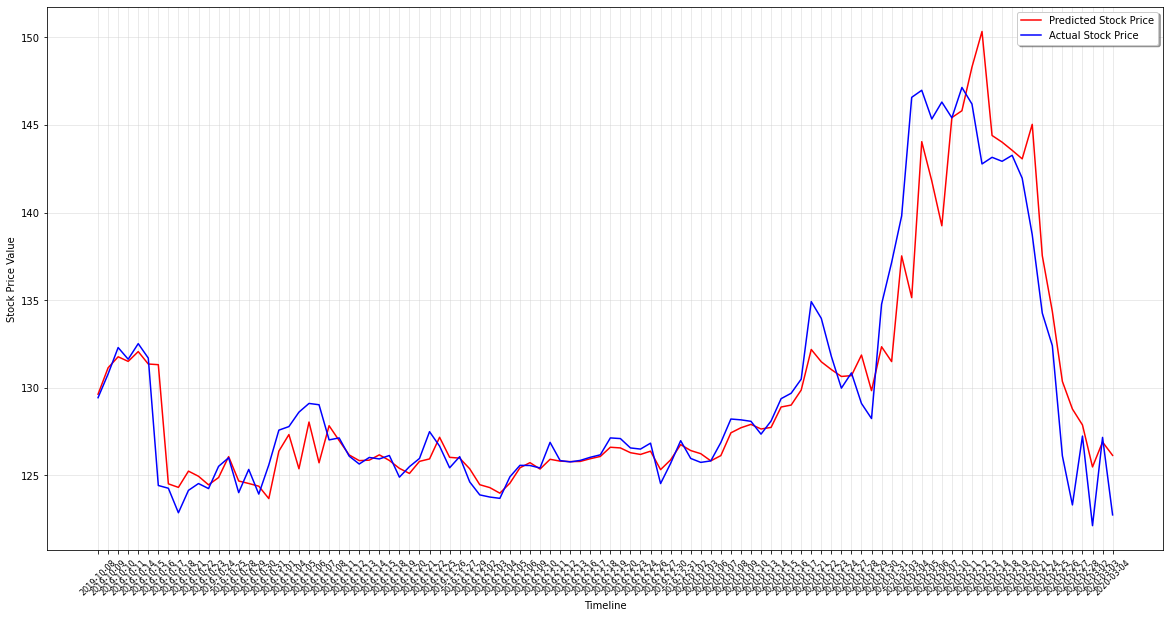

mae: 1.0927951762848445
rmse: 1.834587153063191
mape: 0.0212230370972755


In [17]:
codeM.allStock(data_scaler_PCA, model, 6)

'NSC'

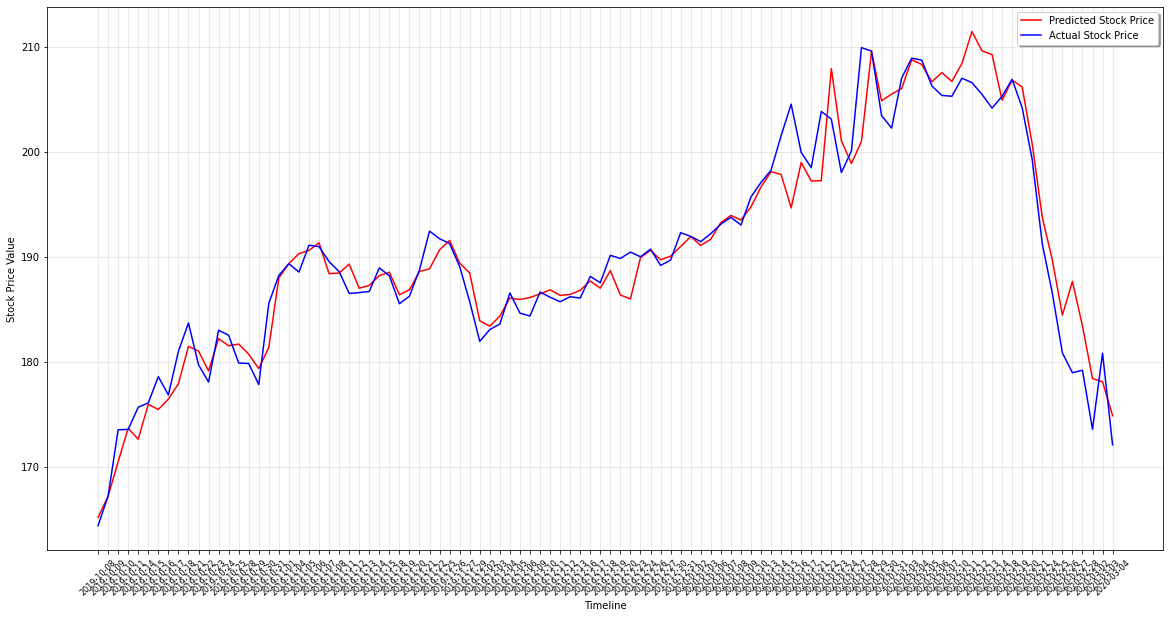

mae: 0.8107799941448958
rmse: 1.727350283748427
mape: 0.022045087255276145


'GL'

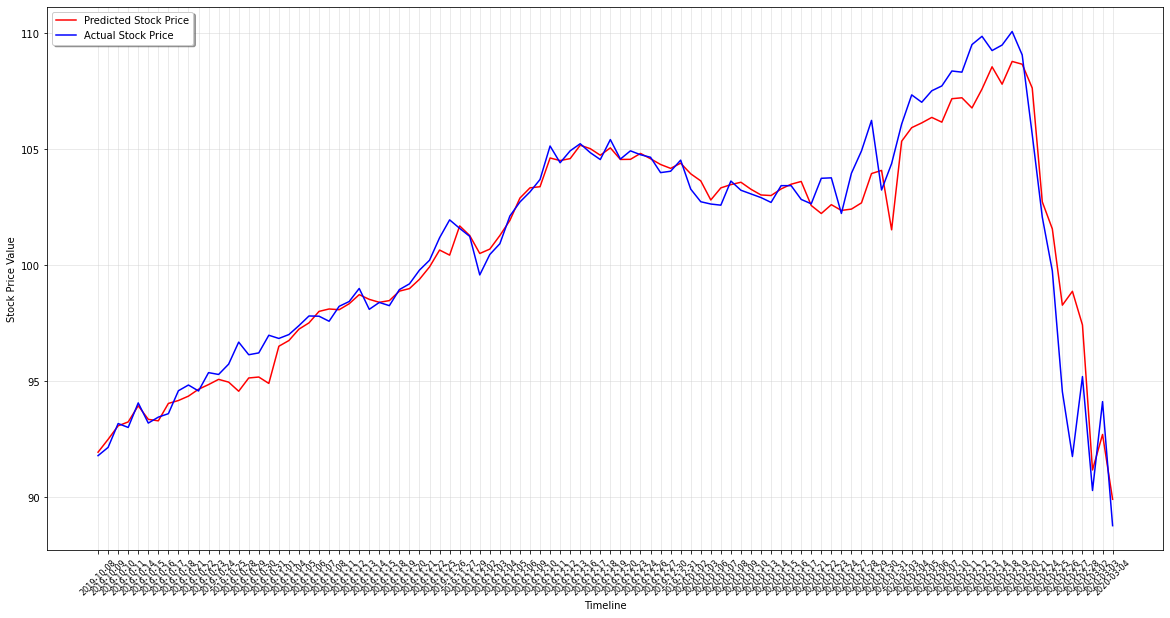

mae: 0.385718832850618
rmse: 0.9022967725803168
mape: 0.022150989439144723


'PEP'

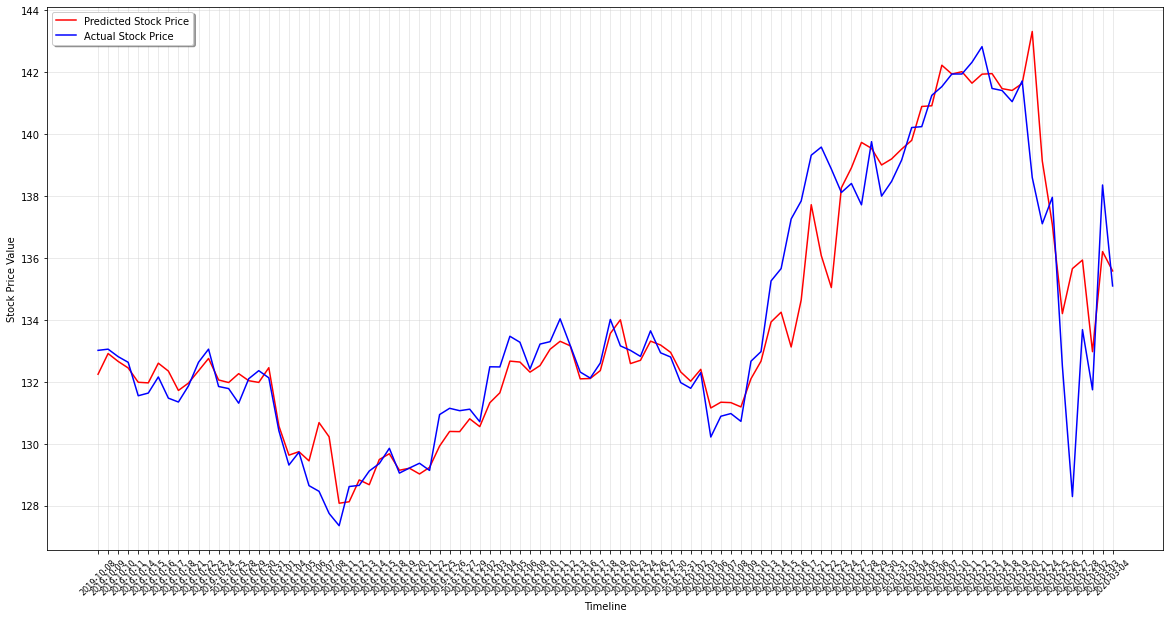

mae: 0.5253021692792567
rmse: 0.9430859840305308
mape: 0.01979978540455586


'BDX'

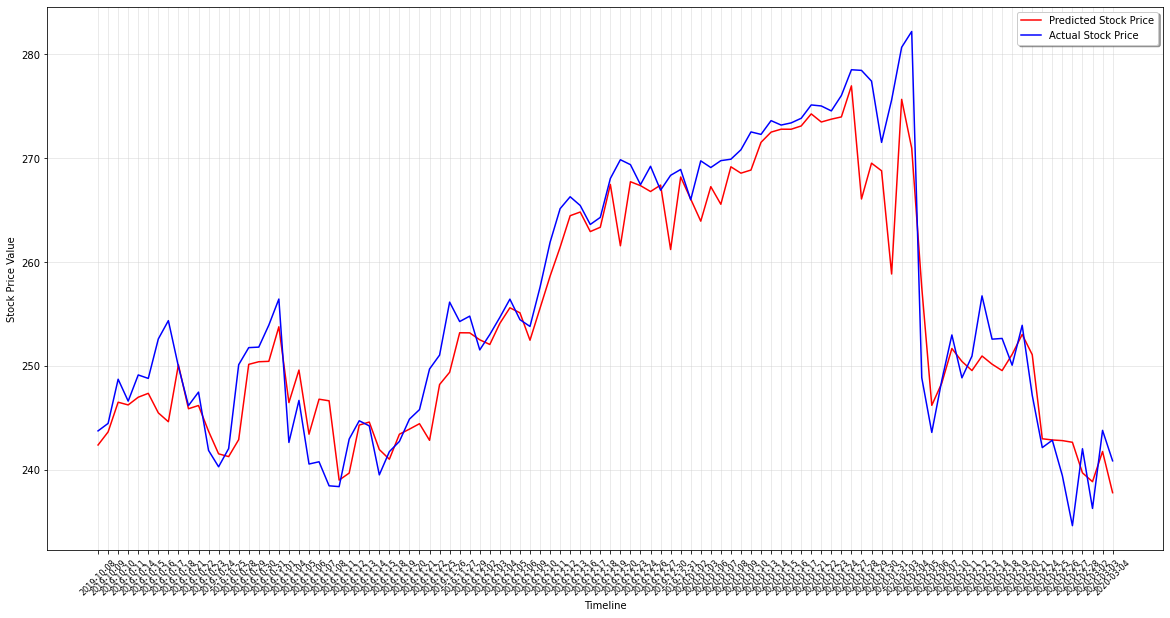

mae: 1.0052273415847364
rmse: 2.105578354618491
mape: 0.02532052167366423


'IBM'

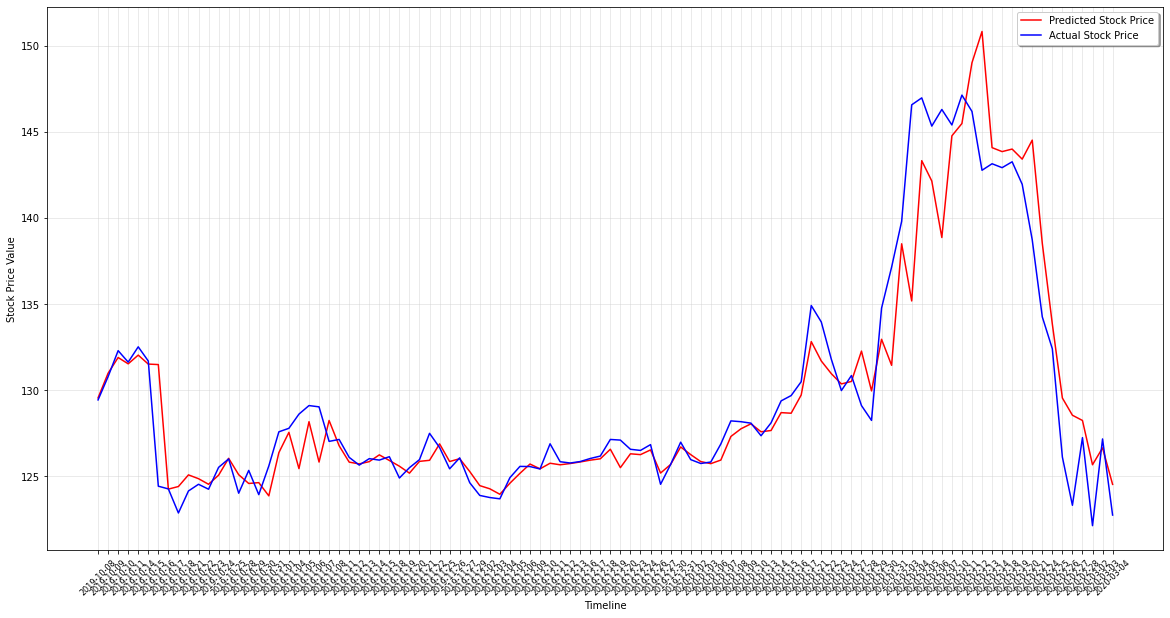

mae: 1.0986207708215827
rmse: 1.8399307963864315
mape: 0.02147924772620394


In [18]:
codeM.allStock(data_scaler_PCA, model, 6, isScaled=True)

## pca window


In [19]:
data_scaler_window = pd.read_csv('datawindowPCA.csv', header=[0,1], index_col=0)
data_scaler_window.set_index(pd.DatetimeIndex(list(data_scaler_window.index)).strftime('%Y-%m-%d'), inplace=True)
data_scaler_window

Attributes         0                                                  1  \
Symbol           BDX        GL       IBM        NSC       PEP       BDX   
1985-03-14 -2.607346 -2.744748 -3.220998  -2.503028 -3.340982 -0.095462   
1985-03-15 -2.581420 -2.808429 -3.233605  -2.466942 -3.348152  0.021050   
1985-03-18 -2.543426 -2.792236 -3.320441  -2.513221 -3.343990  0.150642   
1985-03-19 -2.577317 -2.909088 -3.319276  -2.407511 -3.367740  0.041437   
1985-03-20 -2.601373 -2.725493 -3.227721  -2.512020 -3.386844 -0.039727   
...              ...       ...       ...        ...       ...       ...   
2020-12-22  8.156948  8.472054  3.945776  12.102675  9.080374 -0.265725   
2020-12-23  8.152599  8.398628  3.902778  12.044332  9.102037 -0.314872   
2020-12-24  8.233997  8.381005  3.944941  11.917814  9.068150 -0.744347   
2020-12-28  8.326787  8.386426  3.936018  11.800231  9.074174 -0.985367   
2020-12-29  8.510115  8.329034  3.907765  11.804905  9.091522 -1.451017   

Attributes                                                 2            \
Symbol            GL       IBM       NSC       PEP       BDX        GL   
1985-03-14 -0.104330 -0.068446 -0.160492 -0.049835  0.770484 -1.540526   
1985-03-15 -0.075275  0.064143 -0.100862 -0.091382  1.096881 -1.818180   
1985-03-18 -0.127229  0.148074 -0.288016 -0.063431  0.397070 -2.029712   
1985-03-19 -0.120372  0.118314  0.154614 -0.210034  0.869214 -2.877129   
1985-03-20  0.021261 -0.200119 -0.183881 -0.329133  0.941342 -0.951890   
...              ...       ...       ...       ...       ...       ...   
2020-12-22 -4.061677 -2.189697 -2.898085 -3.336290 -0.759546  1.381778   
2020-12-23 -3.426575 -1.938200 -1.584315 -2.917981  2.054332  2.136803   
2020-12-24 -3.372077 -2.428736 -1.413724 -2.919639 -2.837806 -1.784151   
2020-12-28 -2.927685 -2.038296 -0.660647 -2.615912 -0.600966  0.205616   
2020-12-29 -2.654217 -2.060088 -0.368182 -2.737063 -2.422408  0.084164   

Attributes                                       3                      \
Symbol           IBM       NSC       PEP       BDX        GL       IBM   
1985-03-14 -0.377351 -0.225016  0.883988 -0.739363  0.915692 -1.098949   
1985-03-15 -1.173861  0.462969 -1.114647 -0.354145  1.309586 -1.158762   
1985-03-18 -1.024686  1.304481  0.104625  0.463095  1.529128 -0.534397   
1985-03-19 -0.624775 -1.175168 -0.619128 -0.214694  2.060377 -0.544549   
1985-03-20  1.182514 -0.363542 -0.515465 -0.626982  0.724351 -0.916661   
...              ...       ...       ...       ...       ...       ...   
2020-12-22 -0.629216 -0.957981  1.155894 -0.025281  1.960281  0.566590   
2020-12-23 -1.612757 -5.081913 -1.574786 -0.310244  3.018585  0.495877   
2020-12-24  1.837402 -0.353752  0.548211  0.047656 -2.599381  0.436653   
2020-12-28 -0.950313 -1.367541  0.684773 -0.079424  0.541945  0.358461   
2020-12-29 -0.923558  1.212241  1.254913  0.111357  0.426562  0.069285   

Attributes                             4                                \
Symbol           NSC       PEP       BDX        GL       IBM       NSC   
1985-03-14 -0.166401  0.376932 -0.711538  1.011529  0.302834  0.192544   
1985-03-15  0.306748 -0.261277 -1.069972  1.641131  0.332494 -0.432554   
1985-03-18 -0.389850  0.139366 -0.401536  1.303528  0.069233 -1.255720   
1985-03-19  1.169372 -0.585616 -0.841084  2.426245  0.066082  1.164279   
1985-03-20 -0.303095 -1.004626 -0.886964  0.791332  0.186510  0.331503   
...              ...       ...       ...       ...       ...       ...   
2020-12-22 -0.693079 -0.175720  0.451478  0.546623  0.930747 -1.048870   
2020-12-23 -0.205877  0.030431  0.760572  0.470492  0.789336 -2.431219   
2020-12-24 -0.969619 -0.254681 -1.294812  0.595326  0.776263  0.571055   
2020-12-28 -1.169122  0.374199 -0.500630  0.372295  0.631814 -0.299565   
2020-12-29 -1.284842 -0.246757 -0.973023  0.352013  0.485068  0.806201   

Attributes            ...        38                                          \
Symbol           PEP  ...       BDX        GL       IBM 

In [19]:
dataNSC_scaler = data_scaler_window.xs('NSC', level=1, axis=1)

In [26]:
model = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
parameter_space = {
    'n_estimators': [100, 150, 200],
    'min_samples_leaf': [1, 3],
    'max_features': ['auto', 0.5],
    'oob_score': [True, False],
    'max_depth' :[None, 6],
}
i=0.2
codeM.gridSearch(model,dataNSC_scaler, parameter_space,0.3,8,i)

{'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 200, 'oob_score': False}
1.703516955521096


In [20]:
Params5 = {'max_features': 0.5, 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200, 'oob_score': False}
model = RandomForestRegressor(max_features= Params5['max_features'], max_depth= Params5['max_depth'],  
                              min_samples_leaf= Params5['min_samples_leaf'], n_estimators=Params5['n_estimators'], 
                              oob_score= Params5['oob_score'])

'NSC'

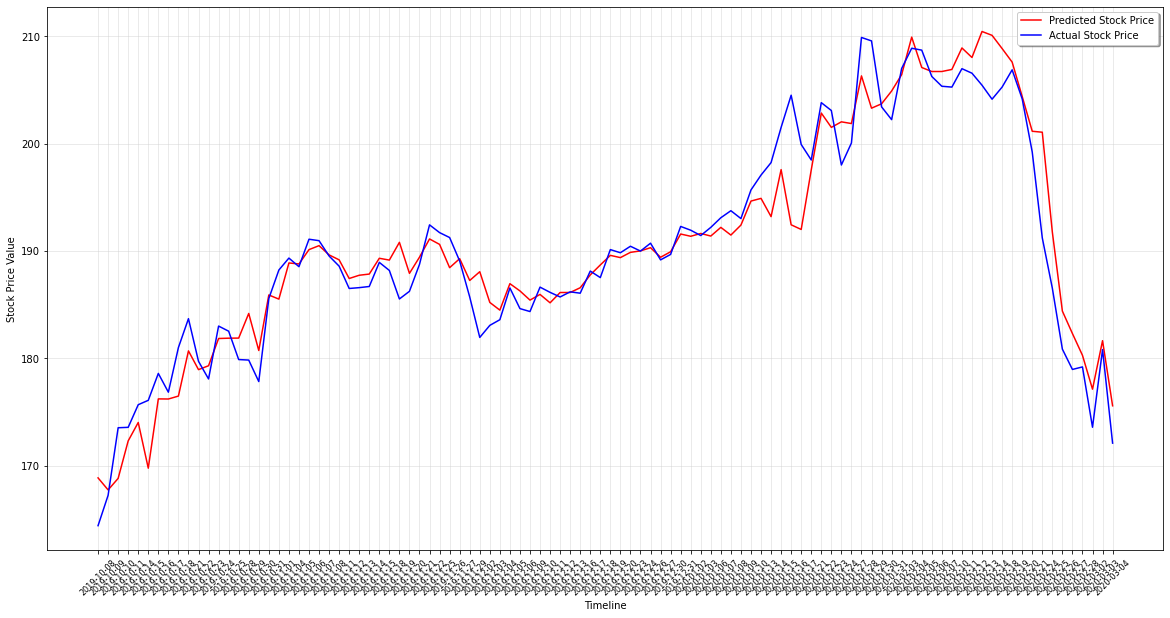

mae: 0.8820992312935121
rmse: 1.7229306878619273
mape: 0.025123821093060637


'GL'

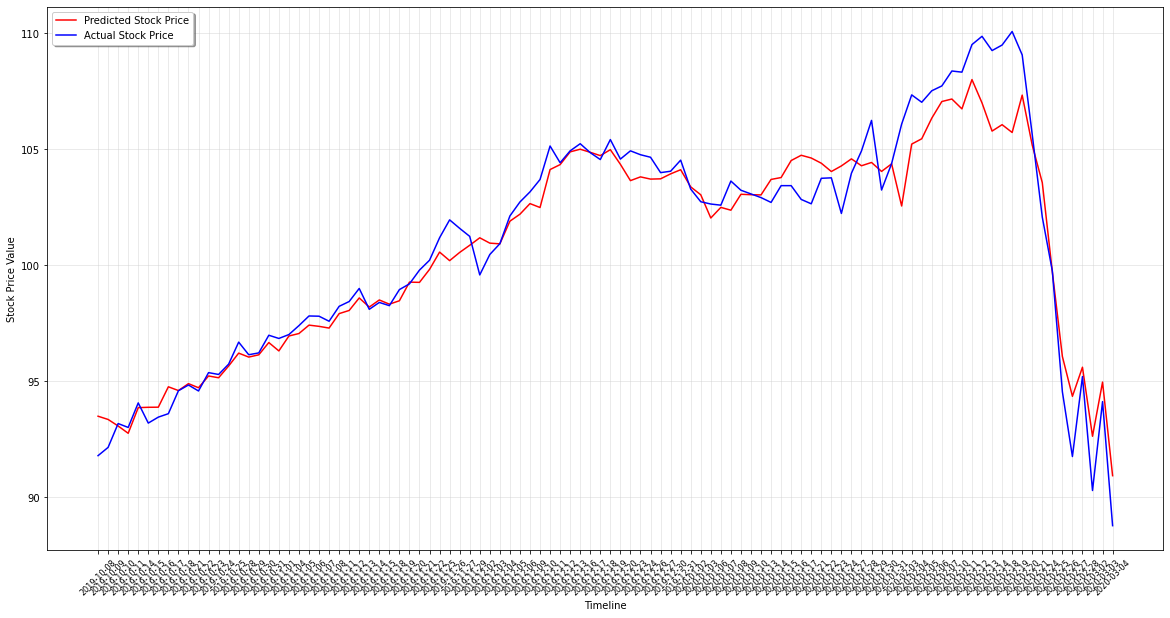

mae: 0.4051153420730406
rmse: 0.7682000546354942
mape: 0.02589666116736326


'PEP'

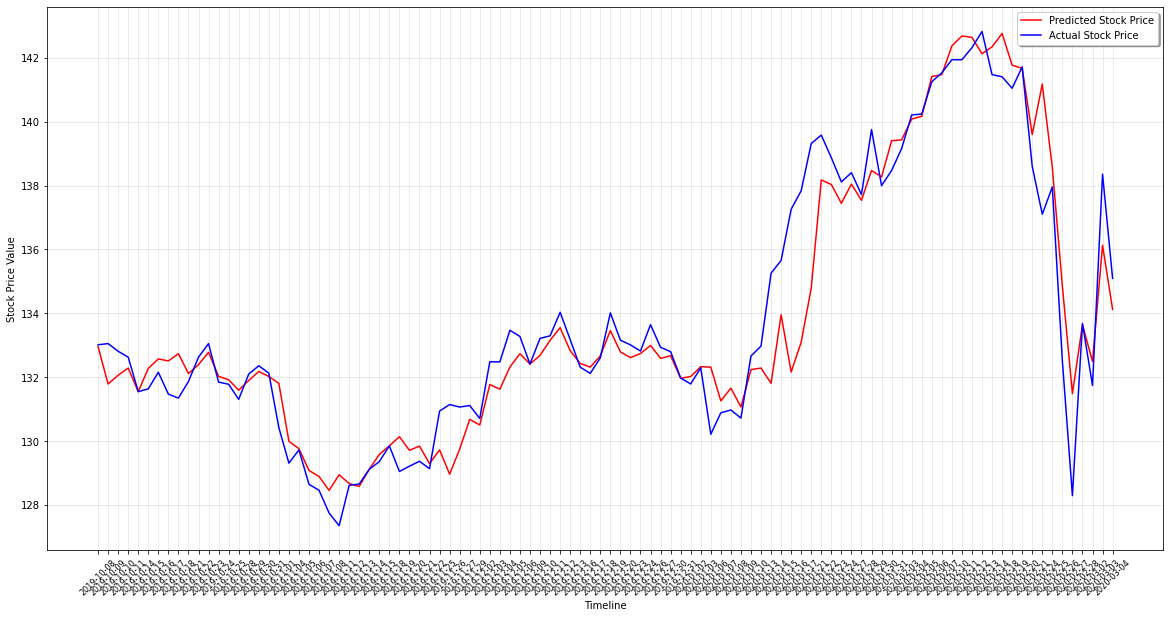

mae: 0.600903239082841
rmse: 1.0137681057561188
mape: 0.025842095030518982


'BDX'

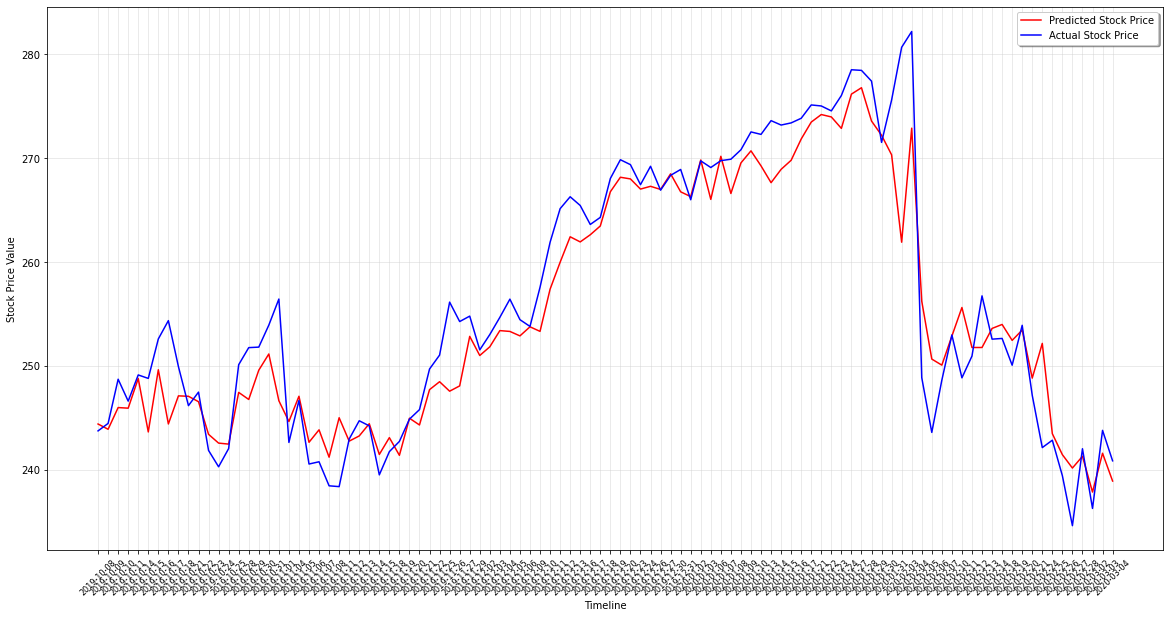

mae: 1.1529676187225582
rmse: 2.32927641973517
mape: 0.03228588777942886


'IBM'

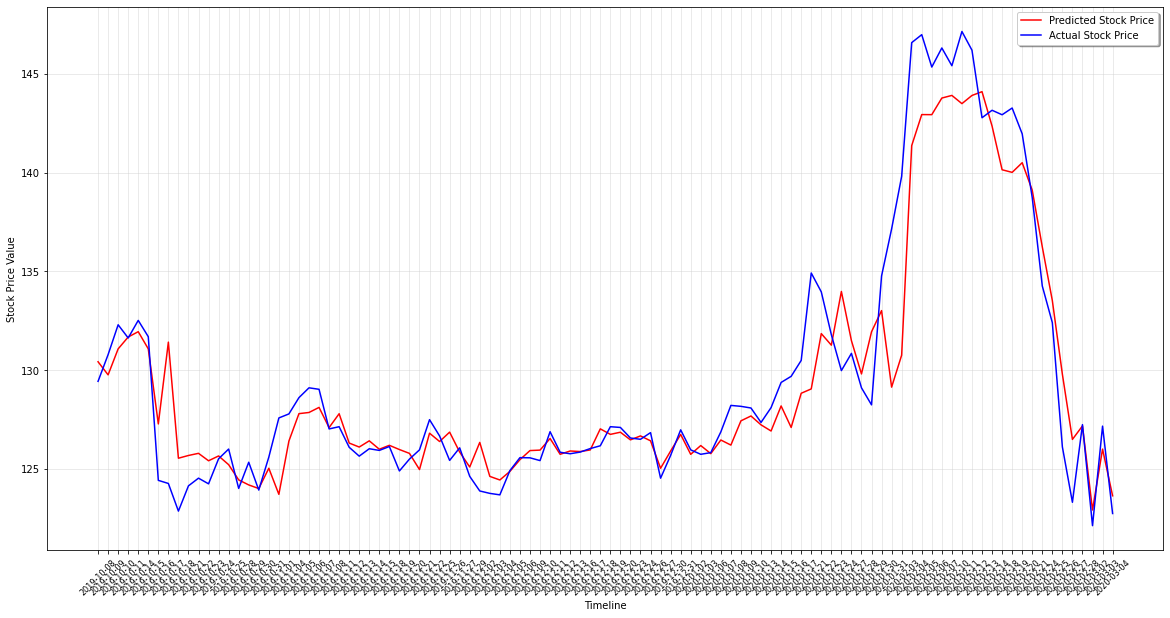

mae: 1.254171796211423
rmse: 1.9665548935316994
mape: 0.024380965032170243


In [21]:
codeM.allStock(data_scaler_window, model, 41)

## data window pca all scaled

'NSC'

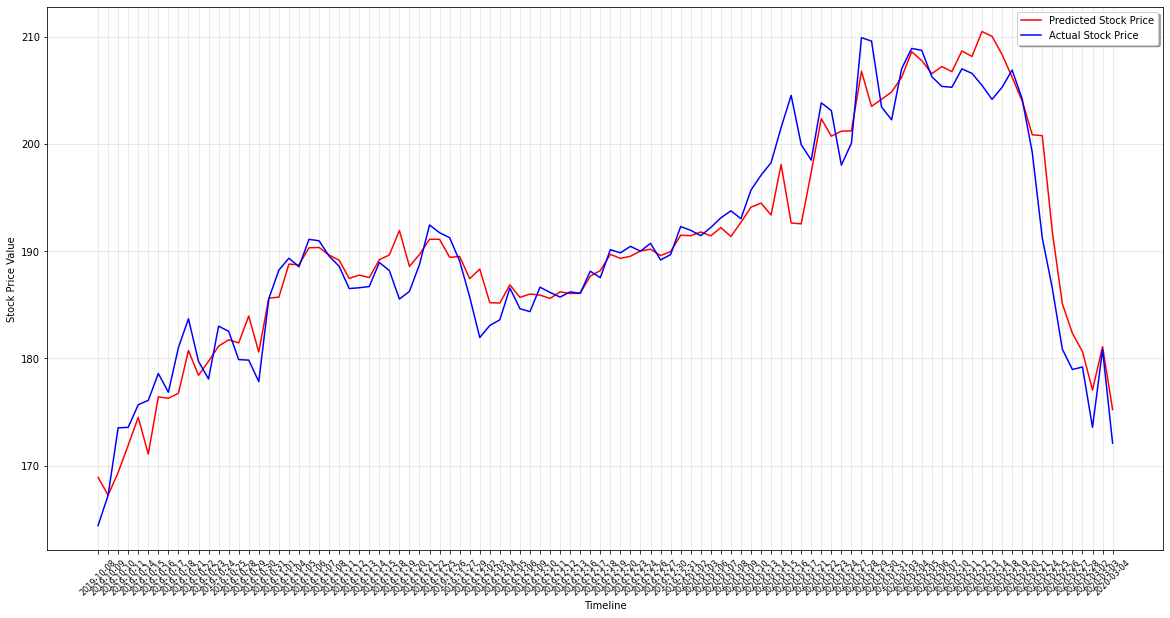

mae: 0.8737628934068074
rmse: 1.6991544417740336
mape: 0.024999639437673176


'GL'

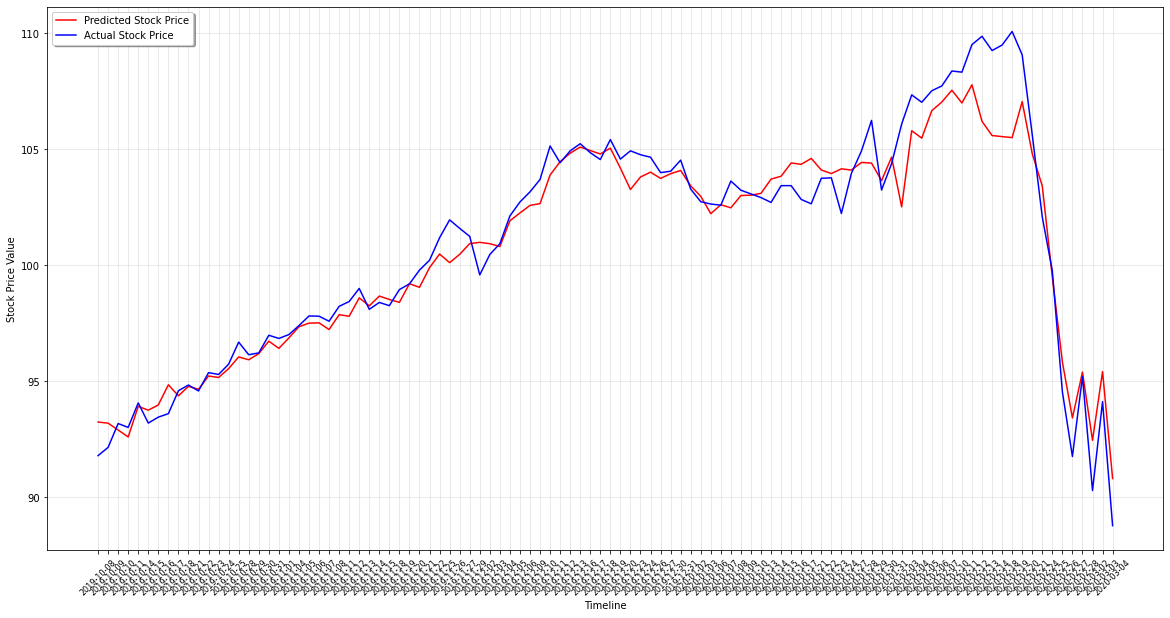

mae: 0.4042516455889894
rmse: 0.7694865194337964
mape: 0.026064610113581403


'PEP'

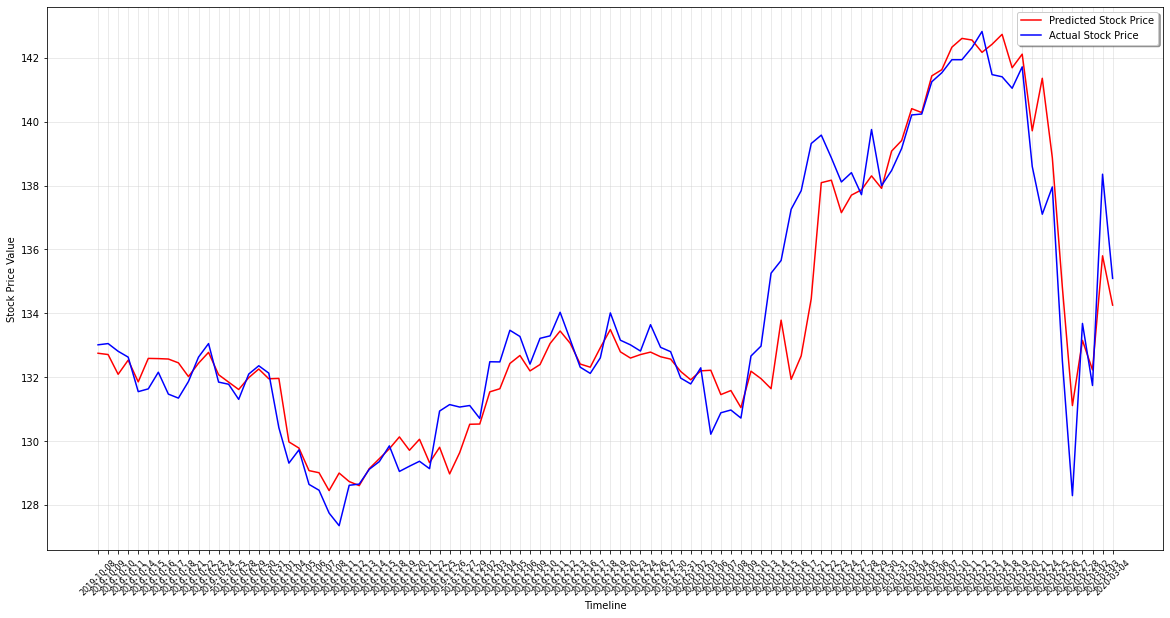

mae: 0.6042967973888947
rmse: 1.0304809061471891
mape: 0.02573717738212487


'BDX'

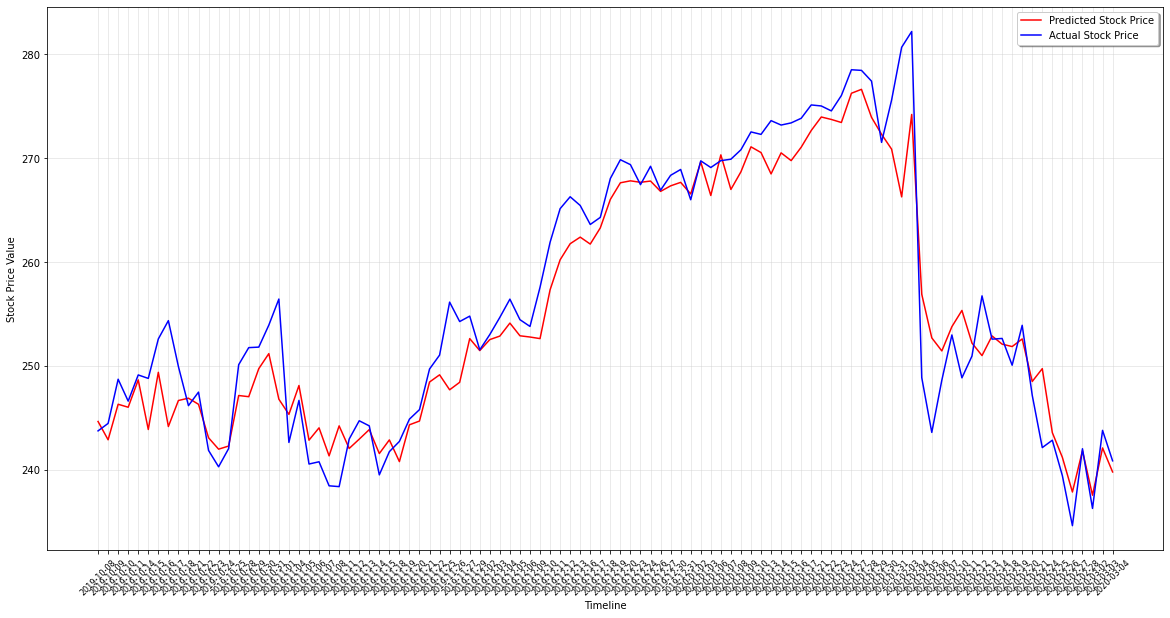

mae: 1.1434993382842522
rmse: 2.3024750825498943
mape: 0.03224621781233215


'IBM'

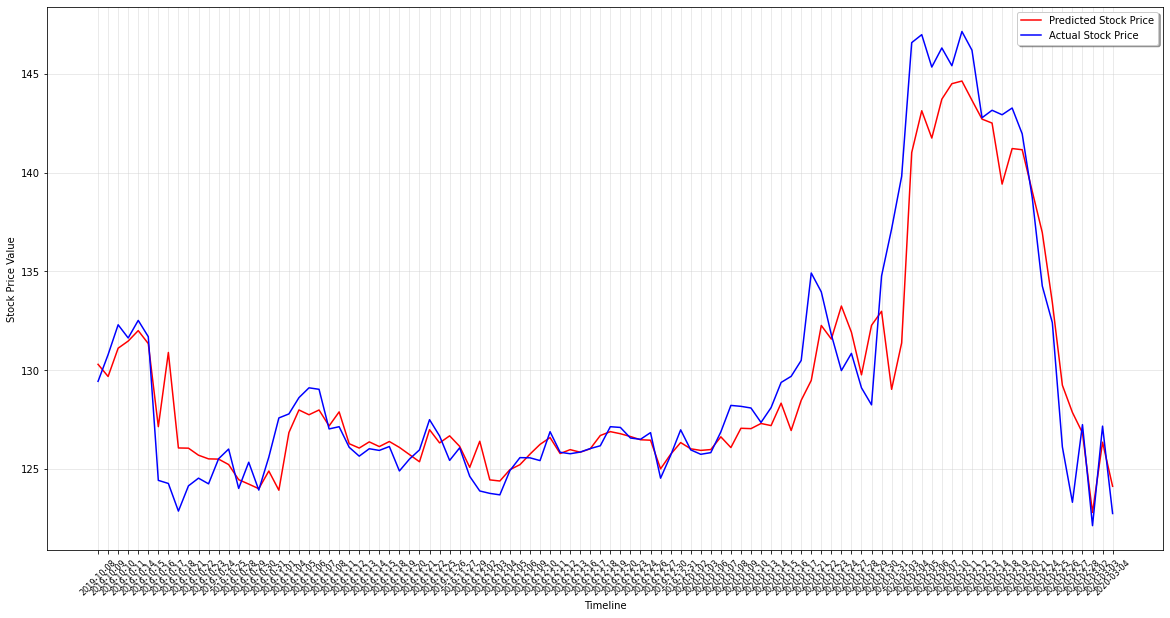

mae: 1.2484203610703837
rmse: 1.962078807474652
mape: 0.024296024364796664


In [22]:
codeM.allStock(data_scaler_window, model, 41, isScaled=True)